#       MERCEDES-BENZ GREENER MANUFACTURING

## PROJECT OVERVIEW :

<font size=4>To ensure safety and reliability, Daimler (Mercedes-Benz) has developed a Robust
testing system for their automobiles with different configurations before they
reach their customers. With the power of machine learning we predict the process time
and help the manufacturers optimize the time a car spends on the test bench.

  Optimizing the speed of their testing system for so many possible feature combinations
is complex and time-consuming without a powerful algorithmic approach. The model
predicted provides insight to what extent and how the car configuration affects our
process time and it will be helpful for the engineers to optimize and reduce the time that
cars spend on the test bench resulting in speedier testing.
</font>

## OBJECTIVE :

<font size=4>To Predict the process time of a car on the test bench. This helps the personnel to optimize their testing time and result in quicker testing thereby reducing the carbon dioxide emissions from the process.
</font>

## DATA ACQUISITION :

<font size=4>Data is avaible in a kaggle competion posted by Daimler.
    
  https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/
</font>

In [1]:
# modules 
import pandas as pd
import numpy as np
pd.options.display.max_columns = 999
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pickle
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import os
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

## DATA OVERVIEW :

In [77]:
# Load the datasets

dataframe_train = pd.read_csv("train.csv")
dataframe_test = pd.read_csv("test.csv")

In [79]:
print("Train dataset info : ")
print('>'*50)
print()
dataframe_train.info()

Train dataset info : 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [80]:
print("Test dataset info: ")
print('>'*50)
print()
dataframe_test.info()

Test dataset info: 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [81]:
print('length of train data = ' ,len(dataframe_train))
print('length of test data = ' ,len(dataframe_test))

length of train data =  4209
length of test data =  4209


> <font size=3>The Number of datapoints in both train and test datasets are 4209.</font>

In [103]:
dataframe_train.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  \
0   0  130.81   k  v  at  a  d  u  j  o    0    0    0    1    0    0    0   
1   6   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0   
2   7   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    0   
3   9   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0   
4  13   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0   

   X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  \
0    0    1    0    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    1    0    0    0    0    0    0    0    1    0    0    0    1    0   
2    1    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
3    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
4    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   

   X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  \
0    0    0    1    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    0    1    0    1    0    0    0    0    0    0    0    0    0    0   
2    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   
3    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   
4    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   

   X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  \
0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
1    0    0    0    1    0    0    0    0    0    0    0    0    0    1    0   
2    0    0    0    1    0    0    1    0    0    0    1    0    0    1    0   
3    0    0    0    0    0    0    1    0    0    0    0    0    0    1    0   
4    0    0    0    1    0    0    1    0    0    0    0    0    0    1    0   

   X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  \
0    0    0    0    0    0    1    0    1    0    0    1    0    0    0    0   
1    0    0    0    0    0    0    0    1    0    0    1    0    0    0    0   
2    0    0    0    0    0    1    0    1    1    0    1    1    1    0    0   
3    0    0    0    0    0    0    0    1    1    0    1    0    1    0    0   
4    0    0    0    0    0    0    0    1    0    0    1    0    1    0    0   

   X79  X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X93  \
0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
1    0    1    0    0    0    0    1    0    0    0    0    0    0    0    0   
2    0    1    0    0    0    1    1    0    0    0    0    0    0    0    0   
3    0    1    0    0    0    1    0    0    0    0    0    0    0    0    0   
4    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X94  X95  X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  \
0    0    0    0    0    0    0     0     0     0     0     0     0     0   
1    0    0    1    0    1    0     1     1     0     0     0     0     0   
2    0    0    1    0    1    0     0     1     0     0     0     0     0   
3    0    0    1    0    1    0     0     1     0     0     0     0     0   
4    0    0    1    0    1    0     0     1     0     0     0     0     0   

   X107  X108  X109  X110  X111  X112  X113  X114  X115  X116  X117  X118  \
0     0     0     0     0     1     0     0     1     0     1     0     1   
1     0     0     0     0     1     0     0     0     0     0     0     1   
2     0     0     0     0     1     0     0     0     0     0     0     0   
3     0     1     0     0     1     0     0     1     0     0     0     0   
4     0     1     0     0     1     0     0     1     0     0     0     0   

   X119  X120  X122  X123  X124  X125  X126  X127  X128  X129  X130  X131  \
0     1     1     0     0     0     0     0     0     1     0     0     1   
1     1     1     0     0     0     0     0     1

In [104]:
dataframe_test.head()

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  X17  X18  \
0   1  az  v   n  f  d  t  a  w    0    0    0    0    0    0    0    0    0   
1   2   t  b  ai  a  d  b  g  y    0    0    0    0    0    0    0    0    0   
2   3  az  v  as  f  d  a  j  j    0    0    0    0    1    0    0    0    0   
3   4  az  l   n  f  d  z  l  n    0    0    0    0    0    0    0    0    0   
4   5   w  s  as  c  d  y  i  m    0    0    0    0    1    0    0    0    0   

   X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  \
0    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
1    1    0    0    0    0    0    0    1    0    0    0    1    0    0    0   
2    0    0    0    0    0    0    0    1    0    1    0    1    0    0    0   
3    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
4    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   

   X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  \
0    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
1    1    0    1    0    0    0    0    0    0    0    1    1    0    0    1   
2    1    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
3    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  \
0    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
1    1    1    0    0    0    0    0    0    1    0    0    1    0    0    0   
2    0    1    0    0    1    0    0    0    1    0    0    1    0    0    0   
3    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
4    0    1    0    0    0    0    0    0    1    0    0    1    0    0    1   

   X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  \
0    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
1    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   
2    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
3    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
4    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   

   X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X93  X94  X95  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   

   X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X107  X108  \
0    1    0    1    0     0     1     0     0     0     0     0     0     0   
1    0    0    1    0     0     1     0     1     0     0     0     0     0   
2    1    0    1    0     1     1     0     1     0     0     0     0     0   
3    1    0    1    0     0     1     0     0     0     0     0     0     0   
4    1    0    1    0     1     1     0     1     0     0     1     0     0   

   X109  X110  X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  \
0     0     0     1     0     0     1     0     0     0     0     0     0   
1     0     0     1     0     0     0     0     1     0     1     1     1   
2     0     0     1     0     0     0     0     0     0     0     0     1   
3     0     0     1     0     0     1     0     0     0     0     0     1   
4     0     0     1     0     0     0     0     0     0     1     1     1   

   X122  X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  \
0     0     0     0     0     0     0     1     0     0     0     1     0   
1     0     0     0     0

### OBSERVATION:

 
 ><font size="3">There are 8 categorical features and 368 Binary Features.</font>
 
 
 
 <font size="3"></font>


In [105]:
# statistical description of the target variable

dataframe_train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

## DATA PREPROCESSING



><font size="4" color='blue'>1. Checking For Missing Values.</font>


In [106]:
dataframe_train.isnull().sum().sum()

0

<font size="3">The sum of missing values in all columns is zero indicating abscence of any missing values.
</font>

><font size="4" color='blue'>2. Checking For Duplicate Rows.</font>


In [107]:
len(dataframe_train[dataframe_train.duplicated()])

0

<font size="3">The sum of missing values in all columns is zero, So there are no missing values.
</font>

## EXPLORATORY DATA ANALYSIS

><font size="4" color='blue'>1. Analysis On Target Variable 'y'</font>


<font size="3"> Percentile values of 'y' .</font>

In [82]:
y = list(dataframe_train['y'].values)

import numpy as np
for i in range(0,101,10):
    print(str(i)+"th percentile =",np.percentile(y,i))

0th percentile = 72.11
10th percentile = 88.07
20th percentile = 89.96
30th percentile = 91.91
40th percentile = 94.84
50th percentile = 99.15
60th percentile = 103.77
70th percentile = 107.766
80th percentile = 110.594
90th percentile = 115.25
100th percentile = 265.32


In [87]:
for i in range(90,101):
    print(str(i)+"th percentile =",np.percentile(y,i))

90th percentile = 115.25
91th percentile = 116.0484
92th percentile = 116.89160000000001
93th percentile = 118.0376
94th percentile = 119.056
95th percentile = 120.80600000000001
96th percentile = 122.4
97th percentile = 125.89319999999998
98th percentile = 129.2992
99th percentile = 137.4304
100th percentile = 265.32


In [88]:
for i in np.linspace(99,100,11):
    print(str(i)+"th percentile =",np.percentile(y,i))

99.0th percentile = 137.4304
99.1th percentile = 139.09024
99.2th percentile = 140.1836
99.3th percentile = 140.81639999999993
99.4th percentile = 142.6480000000001
99.5th percentile = 146.23040000000006
99.6th percentile = 149.0374399999998
99.7th percentile = 151.4276800000003
99.8th percentile = 154.68695999999994
99.9th percentile = 160.38328000000087
100.0th percentile = 265.32


<font size="4" color = "green">99.9 percent values of the target values lie under 160.38 
</font>

<font size="4" >Let us draw the Scatter plot of Log Transformed target variable.(Here we visualize log transformed data to reduce skew and making data more interpretable.) </font>

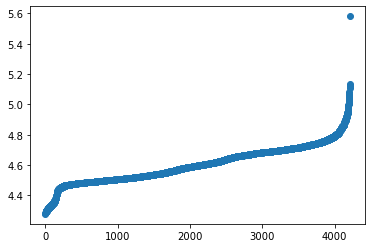

In [111]:
a = list(dataframe_train['y'].apply(np.log))
x = list(range(dataframe_train.shape[0]))
a.sort()
plt.scatter(x,a)

### Observation:
<font size="4" color = "green">There is only one point that lies beyond 250,This Point can be considered as an outlier. 
</font>

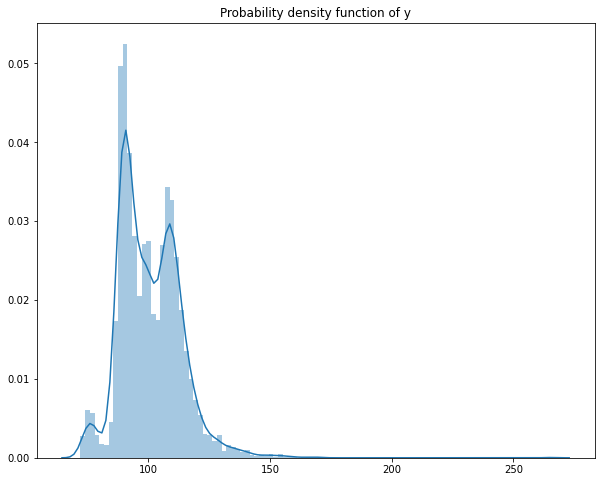

In [112]:
# Probability density function of the target variable.

plt.figure(figsize=(10,8))
sns.distplot(dataframe_train['y'].values,bins=100)
plt.title('Probability density function of y')
plt.show()

### Observation:
<font size="4" color = "green"> The distribution is positively skewed, Most of the test durations lie between 90 and 120.
</font>

><font size="4" color='blue'>2. Analysis On Categorical Features.(X0,X1,X2,X3,X4,X5,X6 and X8)</font>


In [113]:
# function which returns the boxplot of target variable(process time) with a feature.

def Boxplot(feature):
    sorted1 = list(np.sort(dataframe_train[feature].unique()))
    plt.figure(figsize=(14,8))
    sns.boxplot(x=feature, y='y', data=dataframe_train, order=sorted1)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title("Distribution of Process time with "+ feature, fontsize=15)
    plt.show()

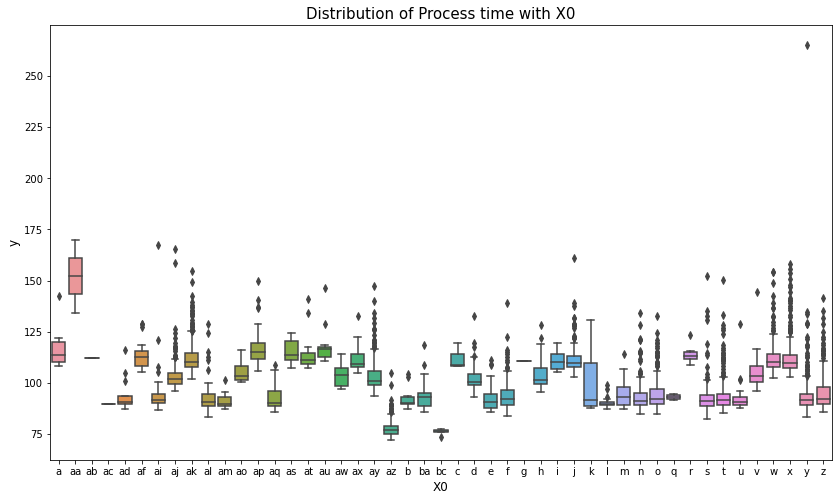

In [114]:
Boxplot('X0')

### Observations :

1. The above plot shows the Box plot between the target variable and the categories present in X0 feature.

2. The distribution of the target variable ranges from 70 to 160. There is a category 'x' in which a point lies far away this can be considered as an outlier.

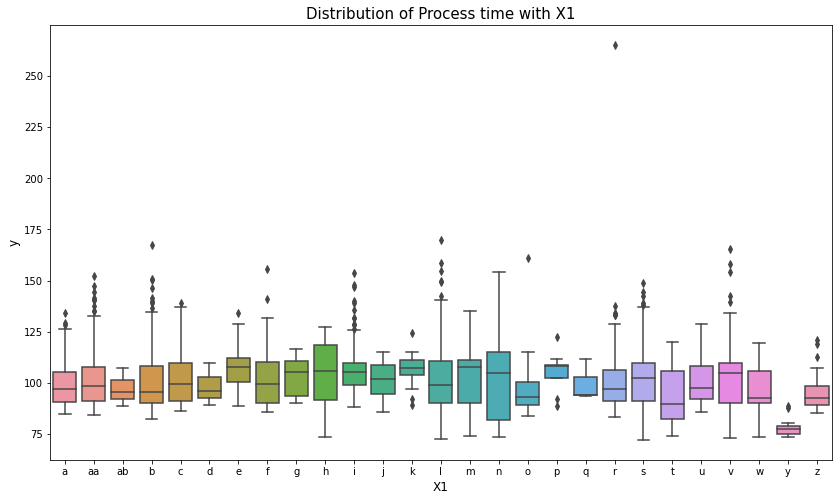

In [115]:
Boxplot('X1')

### Observations :

1. The above plot shows the Box plot between the target variable and the categories present in X1 feature.

2. The target variable lies between 85 to 120 , with some categories having outliers.


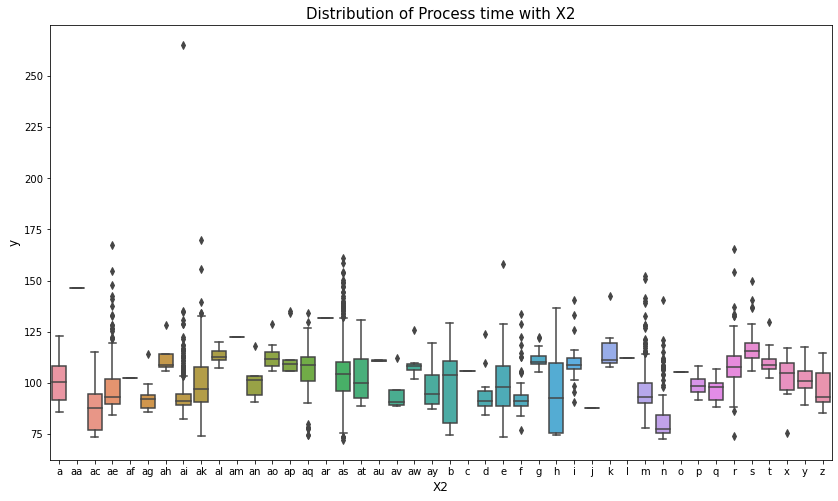

In [116]:
Boxplot('X2')

### Observations :

1. The above plot shows the Box plot between the target variable and the categories present in X2 feature.

2. Some categories have points very far from the interquartile range these can be considered as outliers.

3. The inter quartile range is high in categories like b and h.

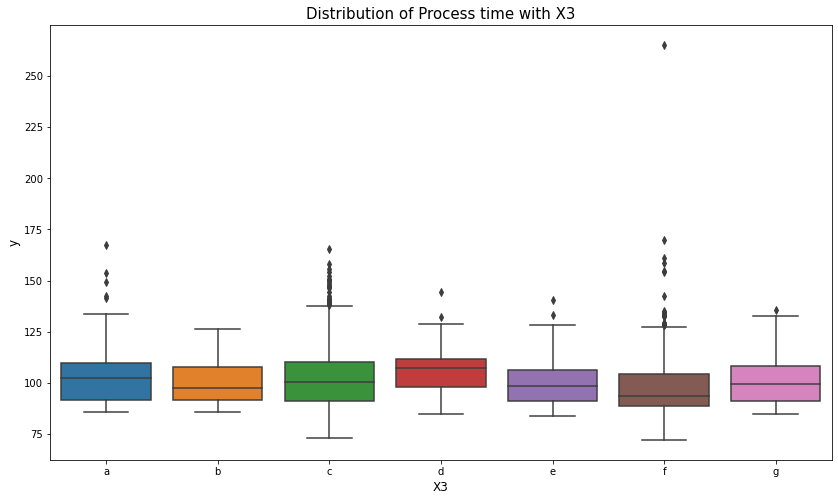

In [117]:
Boxplot('X3')

### Observations :

1. The above plot shows the Box plot between the target variable and the categories present in X3 feature.

2. The target variable lies between 90 to 110 for all categories in X3.

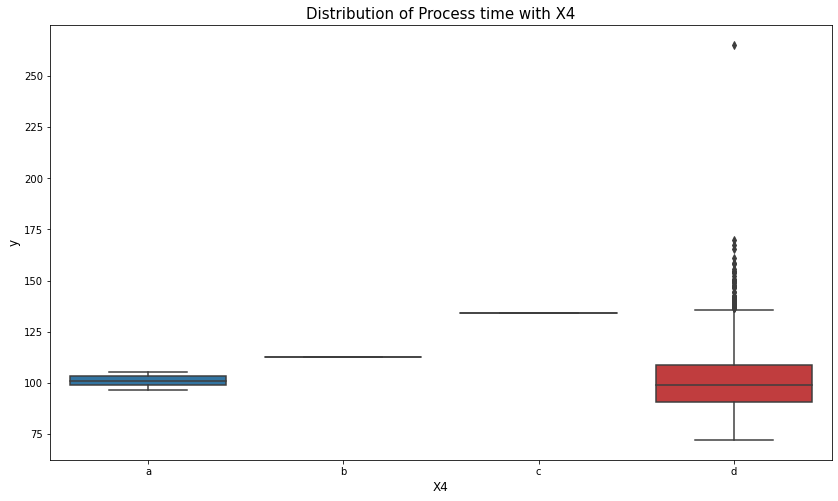

In [118]:
Boxplot('X4')

### Observations :

1. The above plot shows the Box plot between the target variable and the categories present in X4 feature.


2. The categories b and c have one point each, and the variance is quite low in this feature.

In [119]:
# There is only a single point when X4 feature has category 'c' or category 'b'
dataframe_train[dataframe_train['X4']=='b']

ID      y  X0 X1 X2 X3 X4  X5 X6 X8  X10  X11  X12  X13  X14  X15  \
1307  2581  112.8  ap  l  s  c  b  ac  j  l    0    0    0    0    0    0   

      X16  X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  \
1307    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

      X31  X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  \
1307    1    0    0    0    1    0    1    0    0    0    0    0    0    0   

      X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  \
1307    0    1    0    1    1    1    1    1    0    0    0    0    0    1   

      X59  X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  \
1307    0    0    0    0    0    0    0    1    0    1    0    1    1    0   

      X74  X75  X76  X77  X78  X79  X80  X81  X82  X83  X84  X85  X86  X87  \
1307    1    1    0    0    0    0    0    0    0    0    1    1    0    0   

      X88  X89  X90  X91  X92  X93  X94  X95  X96  X97  X98  X99  X100  X101  \
1307    0    0    0    0    0    0    0    0    1    0    0    0     0     0   

      X102  X103  X104  X105  X106  X107  X108  X109  X110  X111  X112  X113  \
1307     0     0     0     0     0     0     0     0     0     0     0     1   

      X114  X115  X116  X117  X118  X119  X120  X122  X123  X124  X125  X126  \
1307     1     0     1     0     1     1     0     0     0     0     0     1   

      X127  X128  X129  X130  X131  X132  X133  X134  X135  X136  X137  X138  \
1307     0     0     1     1     0     0     0     1     0     1     1     0   

      X139  X140  X141  X142  X143  X144  X145  X146  X147  X148  X150  X151  \
1307     0     0     0     1     0     0     0     0     1     0     1     0   

      X152  X153  X154  X155  X156  X157  X158  X159  X160  X161  X162  X163  \
1307     0     0     1     1     0     1     0     0     0     0     0     1   

      X164  X165  X166  X167  X168  X169  X170  X171  X172  X173  X174  X175  \
1307     0     0     0     0     0     0     1     0     0     0     0     0   

      X176  X177  X178  X179  X180  X181  X182  X183  X184  X185  X186  X187  \
1307     0     0     0     1     1     0     0     0     0     0     0     1   

      X189  X190  X191  X192  X194  X195  X196  X197  X198  X199  X200  X201  \
1307     0     0     0     0     1     0     0     0     1     0     0     0   

      X202  X203  X204  X205  X206  X207  X208  X209  X210  X211  X212  X213  \
1307     0     0     0     1     0     0     1     0     0     0     0     0   

      X214  X215  X216  X217  X218  X219  X220  X221  X222  X223  X224  X225  \
1307     0     0     0     0     1     0     0     0     1     1     0     0   

      X226  X227  X228  X229  X230  X231  X232  X233  X234  X235  X236  X237  \
1307     0     0     1     0     0     0     0     0     0     0     0     0   

      X238  X239  X240  X241  X242  X243  X244  X245  X246  X247  X248  X249  \
1307     0     0     0     1     0     0     1     0     1     0     0     0   

      X250  X251  X252  X253  X254  X255  X256  X257  X258  X259  X260  X261  \
1307     0     0     0     0     0     0     0     0     0     0     0     1   

      X262  X263  X264  X265  X266  X267  X268  X269  X270  X271  X272  X273  \
1307     0     1     1     0     0     0     0     0     0     0     0     1   

      X274  X275  X276  X277  X278  X279  X280  X281  X282  X283  X284  X285  \
1307     0     1     0     0     0     0     0     0     0     1     0     0   

      X286  X287  X288  X289  X290  X291  X292  X293  X294  X295  X296  X297  \
1307     0     0     0     0     0     0     0     0     0     0     0     0   

      X298  X299  X300  X301  X302  X304  X305  X306  X307  X308  X309  X310  \
1307     0     0     0     0     0     0     0     1     0     0     0     0   

      X311  X312  X313  X314  X315  X316  X317  X318  X319  X320  X321  X322  \
1307     0     0     0     1     0     0     0     0     0     0     1     0   

      X32

In [120]:
dataframe_train[dataframe_train['X4']=='c']

ID       y  X0 X1  X2 X3 X4  X5 X6 X8  X10  X11  X12  X13  X14  X15  \
1308  2584  134.04  ak  e  ap  c  c  ac  j  j    0    0    0    0    0    0   

      X16  X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  \
1308    1    0    0    0    0    0    0    0    0    0    0    0    0    0   

      X31  X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  \
1308    0    0    0    0    0    0    0    0    0    0    0    0    1    0   

      X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  \
1308    1    1    0    0    0    0    0    0    0    0    0    0    0    0   

      X59  X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  \
1308    0    0    1    0    0    0    0    0    0    0    0    1    0    0   

      X74  X75  X76  X77  X78  X79  X80  X81  X82  X83  X84  X85  X86  X87  \
1308    1    0    0    0    0    0    1    0    0    0    0    1    0    0   

      X88  X89  X90  X91  X92  X93  X94  X95  X96  X97  X98  X99  X100  X101  \
1308    0    0    0    0    0    0    0    0    0    0    1    0     0     1   

      X102  X103  X104  X105  X106  X107  X108  X109  X110  X111  X112  X113  \
1308     0     0     0     0     0     0     0     0     0     1     0     0   

      X114  X115  X116  X117  X118  X119  X120  X122  X123  X124  X125  X126  \
1308     0     0     0     0     1     1     1     0     0     0     0     0   

      X127  X128  X129  X130  X131  X132  X133  X134  X135  X136  X137  X138  \
1308     0     1     0     0     0     0     0     0     0     1     0     0   

      X139  X140  X141  X142  X143  X144  X145  X146  X147  X148  X150  X151  \
1308     1     0     0     1     0     0     0     0     0     0     1     0   

      X152  X153  X154  X155  X156  X157  X158  X159  X160  X161  X162  X163  \
1308     0     0     0     0     0     1     0     0     0     0     0     0   

      X164  X165  X166  X167  X168  X169  X170  X171  X172  X173  X174  X175  \
1308     0     0     0     0     0     0     0     1     0     0     0     0   

      X176  X177  X178  X179  X180  X181  X182  X183  X184  X185  X186  X187  \
1308     0     0     1     0     1     0     0     0     0     0     0     1   

      X189  X190  X191  X192  X194  X195  X196  X197  X198  X199  X200  X201  \
1308     1     0     0     0     1     0     0     0     0     0     0     0   

      X202  X203  X204  X205  X206  X207  X208  X209  X210  X211  X212  X213  \
1308     1     0     0     1     0     0     0     1     0     0     0     0   

      X214  X215  X216  X217  X218  X219  X220  X221  X222  X223  X224  X225  \
1308     0     0     0     0     1     0     0     0     0     1     0     0   

      X226  X227  X228  X229  X230  X231  X232  X233  X234  X235  X236  X237  \
1308     0     0     0     1     0     0     0     0     0     0     0     0   

      X238  X239  X240  X241  X242  X243  X244  X245  X246  X247  X248  X249  \
1308     1     0     0     0     0     0     0     0     1     1     0     0   

      X250  X251  X252  X253  X254  X255  X256  X257  X258  X259  X260  X261  \
1308     1     0     0     0     0     0     0     0     0     0     0     1   

      X262  X263  X264  X265  X266  X267  X268  X269  X270  X271  X272  X273  \
1308     0     1     0     1     0     0     0     0     0     0     0     1   

      X274  X275  X276  X277  X278  X279  X280  X281  X282  X283  X284  X285  \
1308     0     1     0     0     0     0     0     0     0     0     1     0   

      X286  X287  X288  X289  X290  X291  X292  X293  X294  X295  X296  X297  \
1308     0     0     0     0     0     0     0     0     0     0     0     0   

      X298  X299  X300  X301  X302  X304  X305  X306  X307  X308  X309  X310  \
1308     0     0     0     0     0     1     0     0     0     0     0     0   

      X311  X312  X313  X314  X315  X316  X317  X318  X319  X320  X321  X322  \
1308     1     0     0     1     0     0     0     0     0     0     0     0   

     

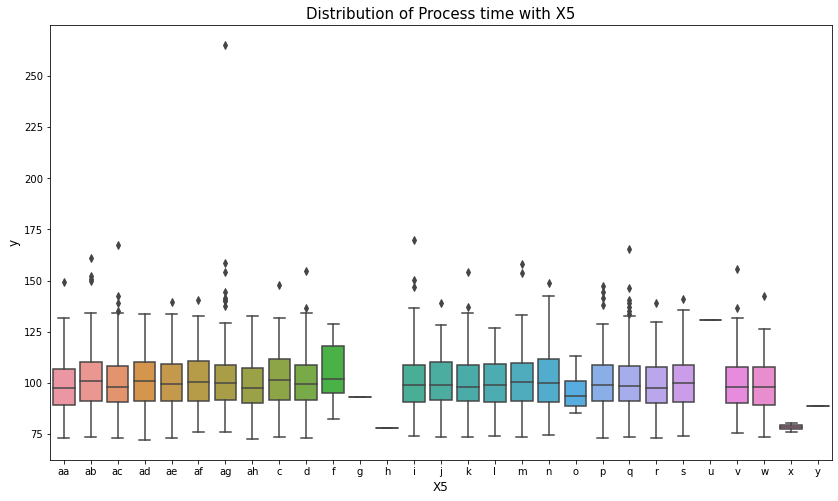

In [121]:
Boxplot('X5')

### Observations :

1. The above plot shows the Box plot between the target variable and the categories present in X5 feature.

2. The target variable lies between 90 to 110 for almost all categories in X5, categories g,h and y have very few points.

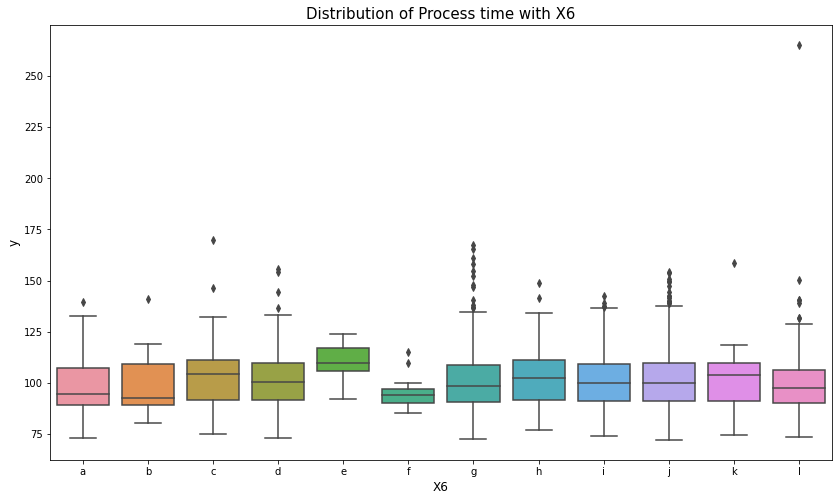

In [122]:
Boxplot('X6')

### Observations :

1. The above plot shows the Box plot between the target variable and the categories present in X6 feature.

2. The target variable lies between 90 to 110 for almost all categories in X6.categories g,j have many outliers.

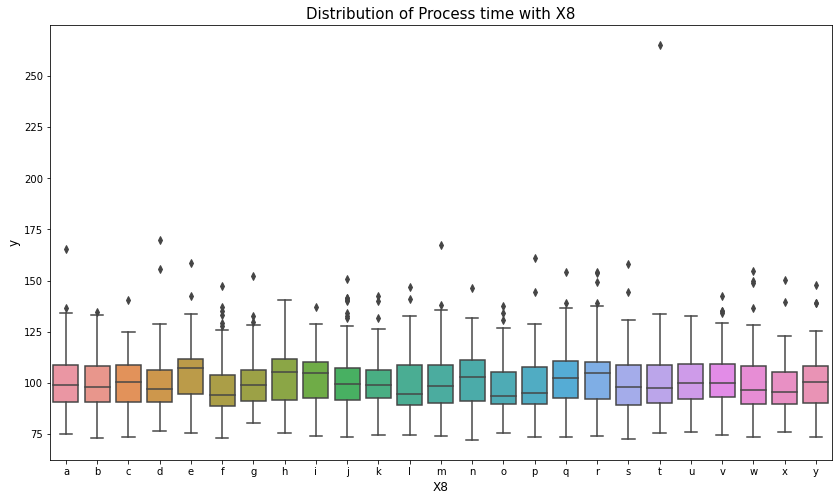

In [123]:
Boxplot('X8')

### Observations :

1. The above plot shows the Box plot between the target variable and the categories present in X8 feature.

2. The target variable lies between 90 to 110 for almost all categories in X8 with some outliers.

## From the above uni-variate analysis on the categorical variables we conclude that in feature X4 The variance is quite low and therefore it is the least important feature among them.

><font size="4" color='blue'>3. Analysis On Binary Features</font>


<font size="3" >There are 368 binary features. Let us check the number of zeros and ones in each feature  .</font>


In [124]:
data_binaryfeatures = dataframe_train.drop(["ID","y","X0","X1","X2","X3","X4","X5","X6","X8"],axis=1)

# Getting counts of 0 and 1 in every binary feature.
zero_counts = []
one_counts = []

for feature in data_binaryfeatures.columns:

    zero_counts.append(data_binaryfeatures[feature][data_binaryfeatures[feature]==0].count())
    one_counts.append(data_binaryfeatures[feature][data_binaryfeatures[feature]==1].count())

    

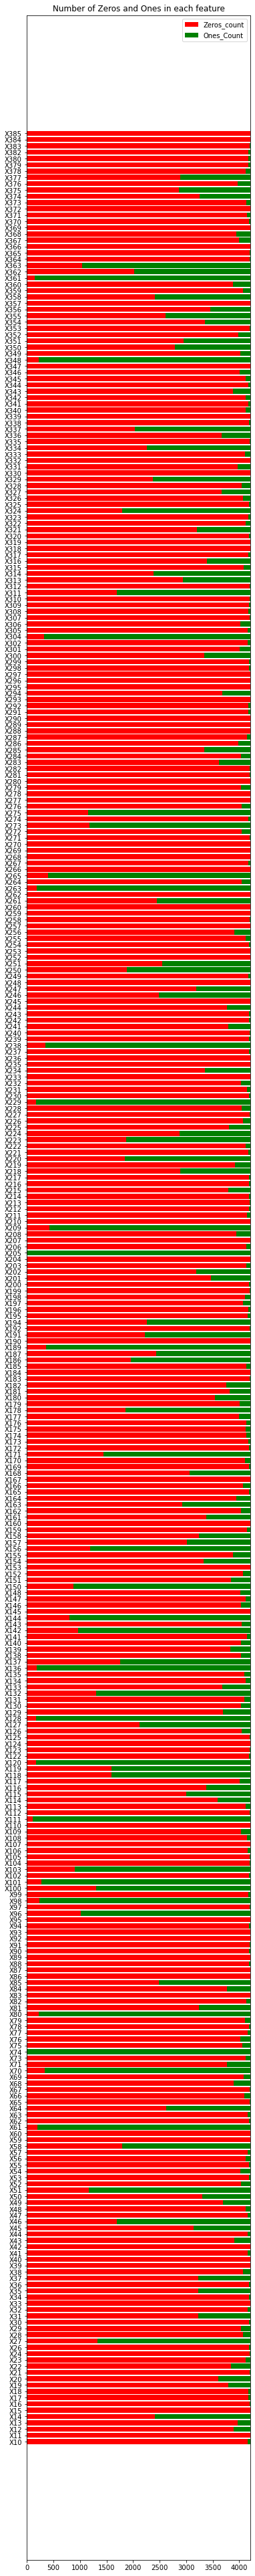

In [125]:
# HORIZANTAL BAR PLOT OF BINARY FEATURES SHOWING THE COUNTS OF 0'S AND 1'S IN EACH FEATURE.
# Reference : https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-mercedes

binary_feature_count = len(data_binaryfeatures.columns)
y_indices = np.arange(binary_feature_count)
plt.figure(figsize=(6,70))
bar_zero =plt.barh(y_indices,zero_counts,color="r")
bar_one = plt.barh(y_indices,one_counts,left=zero_counts,color="g")
plt.yticks(y_indices,data_binaryfeatures.columns)
plt.legend((bar_zero[0],bar_one[0]), ('Zeros_count', 'Ones_Count'))
plt.title("Number of Zeros and Ones in each feature")
plt.show()

<font size="3" >From the above plot it looks like some of the binary features may have only one unique value let us find if there are any such features.</font>


In [126]:
list1 = []
for i in dataframe_train.columns:
    if len(dataframe_train[i].unique()) == 1:
        list1.append(i)
print("Binary features with a single unique value throughout the dataset: \n",list1,'\n',"Number of such columns =", len(list1))

Binary features with a single unique value throughout the dataset: 
 ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'] 
 Number of such columns = 12


In [127]:
with open('Binary_features_with_uniquevalues_throughout.pkl', 'wb') as f:
      pickle.dump(list1,f)

<font size="3" >There are 12 Such features (features with zero variance) and they are removed from our dataset to increase the performance of the model .</font>


In [128]:
with open('Binary_features_with_uniquevalues_throughout.pkl', 'rb') as f:
    list1 = pickle.load(f)

In [129]:
dataframe_train.drop(list1, axis=1,inplace=True)
dataframe_test.drop(list1, axis=1,inplace=True)

In [133]:
dataframe_train.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X12  X13  X14  X15  X16  X17  \
0   0  130.81   k  v  at  a  d  u  j  o    0    0    1    0    0    0    0   
1   6   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0   
2   7   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    1   
3   9   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0   
4  13   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0   

   X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  \
0    1    0    0    1    0    0    0    0    0    0    0    0    1    0    0   
1    1    0    0    0    0    0    0    0    1    0    0    0    1    0    0   
2    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   
3    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   
4    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   

   X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  \
0    0    1    0    1    0    0    0    0    0    0    0    0    1    0    0   
1    0    1    0    1    0    0    0    0    0    0    0    0    0    0    0   
2    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
3    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
4    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   

   X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  \
0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
1    0    0    1    0    0    0    0    0    0    0    0    0    1    0    0   
2    0    0    1    0    0    1    0    0    0    1    0    0    1    0    0   
3    0    0    0    0    0    1    0    0    0    0    0    0    1    0    0   
4    0    0    1    0    0    1    0    0    0    0    0    0    1    0    0   

   X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  \
0    0    0    0    0    1    0    1    0    0    1    0    0    0    0    0   
1    0    0    0    0    0    0    1    0    0    1    0    0    0    0    0   
2    0    0    0    0    1    0    1    1    0    1    1    1    0    0    0   
3    0    0    0    0    0    0    1    1    0    1    0    1    0    0    0   
4    0    0    0    0    0    0    1    0    0    1    0    1    0    0    0   

   X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  \
0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
1    1    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
2    1    0    0    0    1    1    0    0    0    0    0    0    0    0    0   
3    1    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
4    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  \
0    0    0    0    0     0     0     0     0     0     0     0     0     0   
1    1    0    1    0     1     1     0     0     0     0     0     0     0   
2    1    0    1    0     0     1     0     0     0     0     0     0     0   
3    1    0    1    0     0     1     0     0     0     0     0     1     0   
4    1    0    1    0     0     1     0     0     0     0     0     1     0   

   X110  X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  \
0     0     1     0     0     1     0     1     0     1     1     1     0   
1     0     1     0     0     0     0     0     0     1     1     1     0   
2     0     1     0     0     0     0     0     0     0     0     1     0   
3     0     1     0     0     1     0     0     0     0     0     1     0   
4     0     1     0     0     1     0     0     0     0     0     1     0   

   X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  \
0     0     0     0     0     0     1     0     0     1     0     0     0   
1     0     0     0     0     1     1

><font size="4" color='blue'>4. Bi-variate Analysis</font>


In [86]:
# These are the top 30 features with high importance by Randomforest Regressor.
# let us do some Bi-analysis on categorical features (X5,X6,X8)

with open('top_30_features_using_treemodel.pkl', 'rb') as f:
    top30 = pickle.load(f)
top30

['X0',
 'X5',
 'X6',
 'X8',
 'X136',
 'X3',
 'X263',
 'X54',
 'X1',
 'X29',
 'X2',
 'X47',
 'X127',
 'X383',
 'X64',
 'X345',
 'X46',
 'X152',
 'X51',
 'X342',
 'X218',
 'X339',
 'X12',
 'X151',
 'X201',
 'X58',
 'X81',
 'X27',
 'X158',
 'X351']

><font size="4" >Let us do Bi-variate Analysis on features X5,X6,X8.</font>


>> ### Mosaic plot between categorical features X5 and X6.

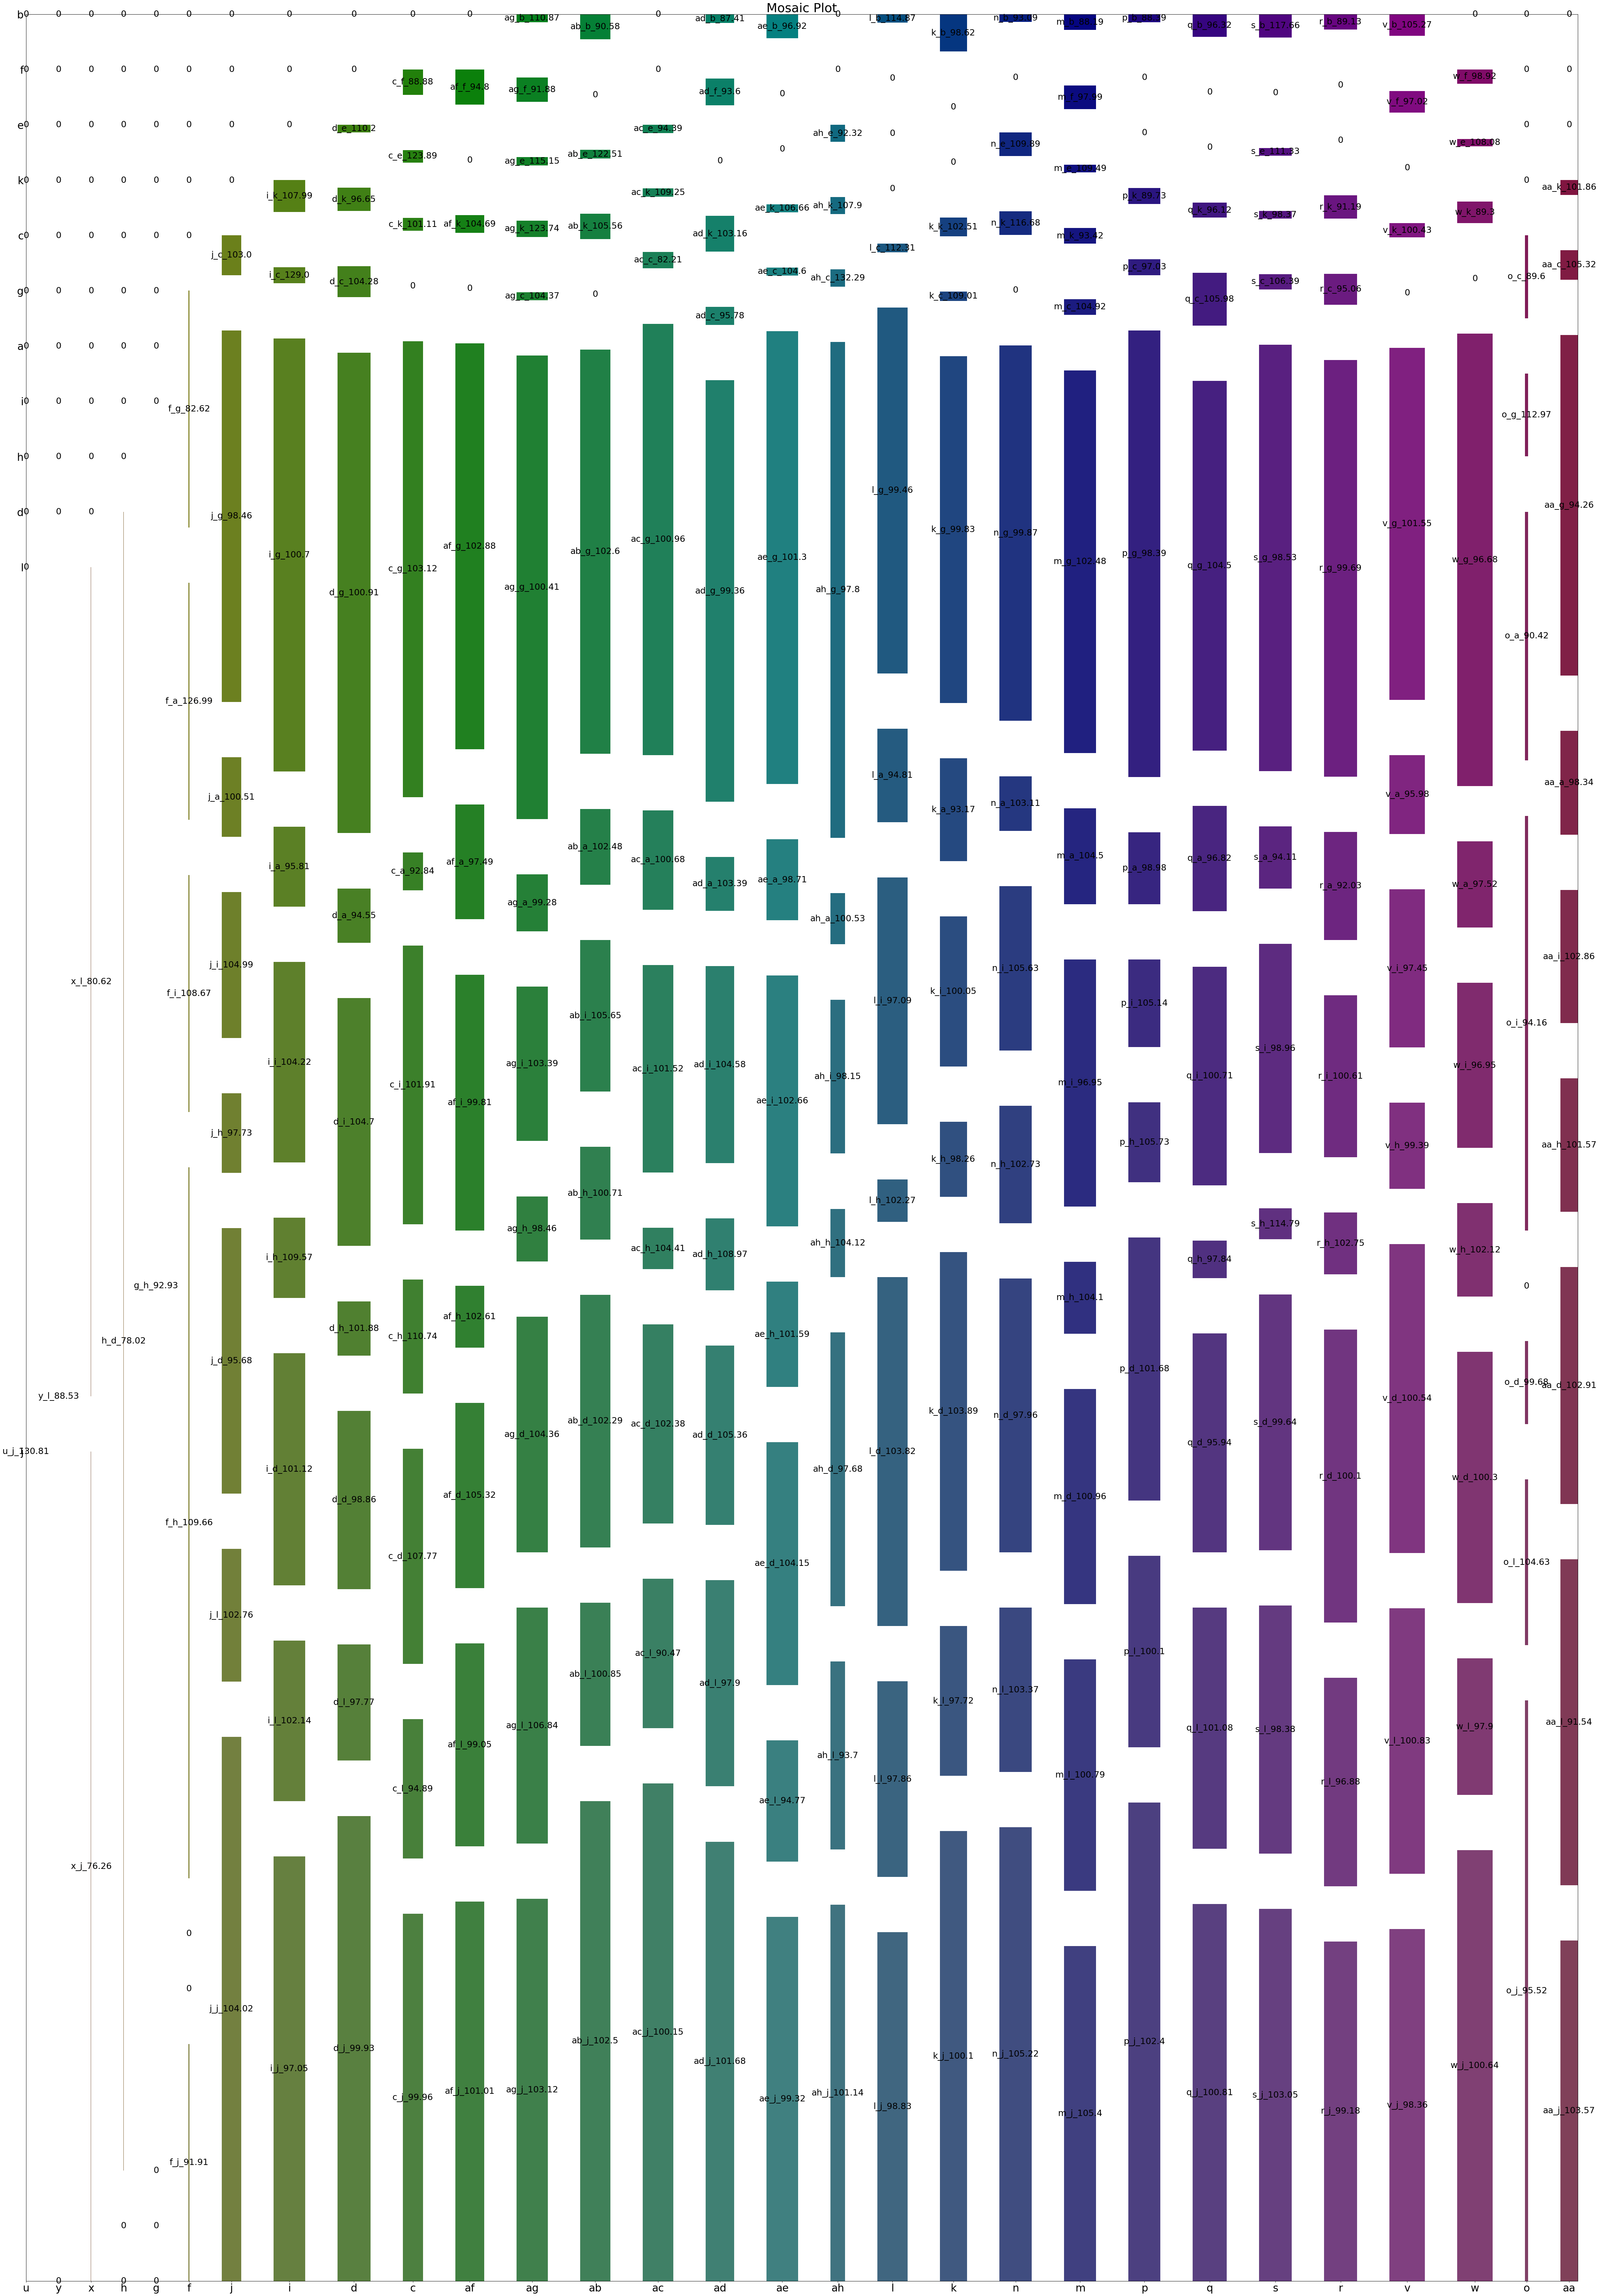

In [399]:
keys = list(dataframe_train.groupby(['X5','X6']).mean().index)
means = dataframe_train.groupby(['X5','X6']).mean()['y'].values
values = []
for i in range(len(keys)):
    
    values.append(keys[i][0]+'_'+keys[i][1]+'_'+str(np.round(means[i],2)))
dict1 = dict(zip(keys,values))


# plt.figure()
labelizer=lambda k: dict1[k] if k in dict1 else 0
mosaic(dataframe_train,['X5','X6'],labelizer=labelizer, title='Mosaic Plot',gap=0.05)
# plt.rcParams['font.size'] = 30.0

# plt.rcParams["figure.figsize"]=(80,120)
plt.show()

>> ### Mosaic plot between categorical features X5 and X8.

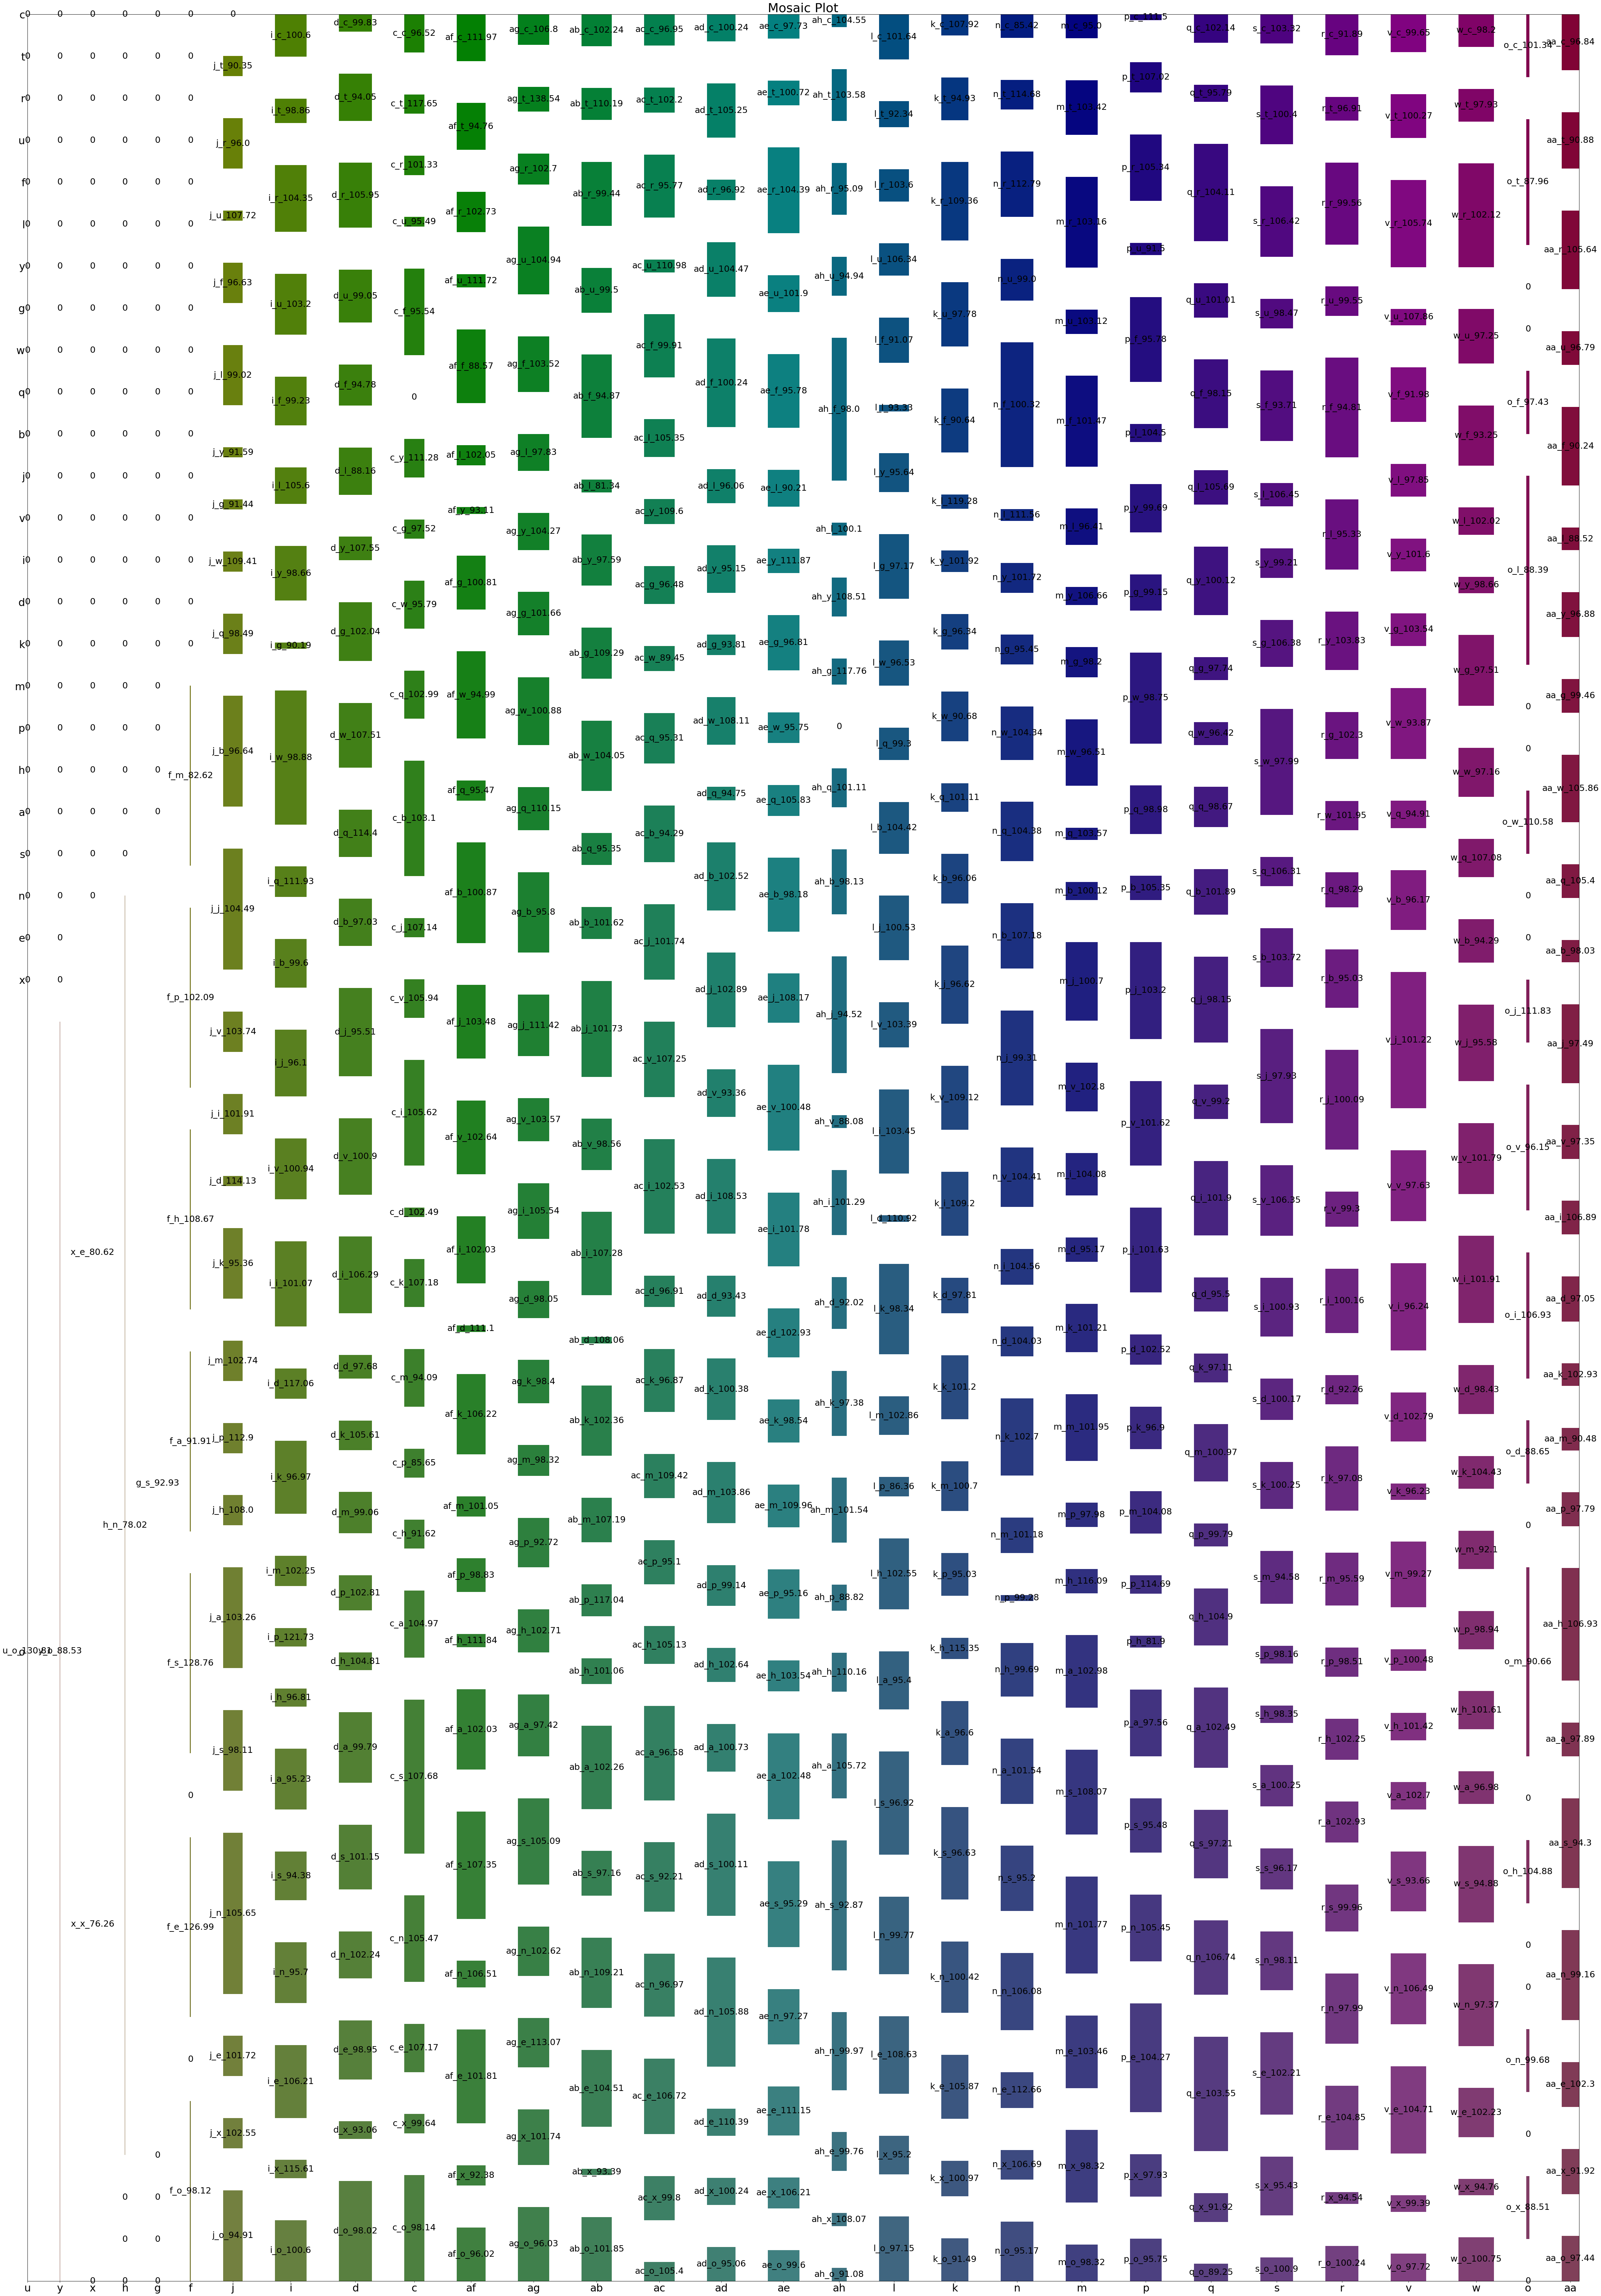

In [400]:
keys = list(dataframe_train.groupby(['X5','X8']).mean().index)
means = dataframe_train.groupby(['X5','X8']).mean()['y'].values
values = []
for i in range(len(keys)):
    
    values.append(keys[i][0]+'_'+keys[i][1]+'_'+str(np.round(means[i],2)))
dict1 = dict(zip(keys,values))



mosaic(dataframe_train,['X5','X8'], title='Mosaic Plot',labelizer=labelizer,gap=0.05)
labelizer=lambda k: dict1[k] if k in dict1 else 0

plt.show()

>> ### Mosaic plot between categorical features X6 and X8.

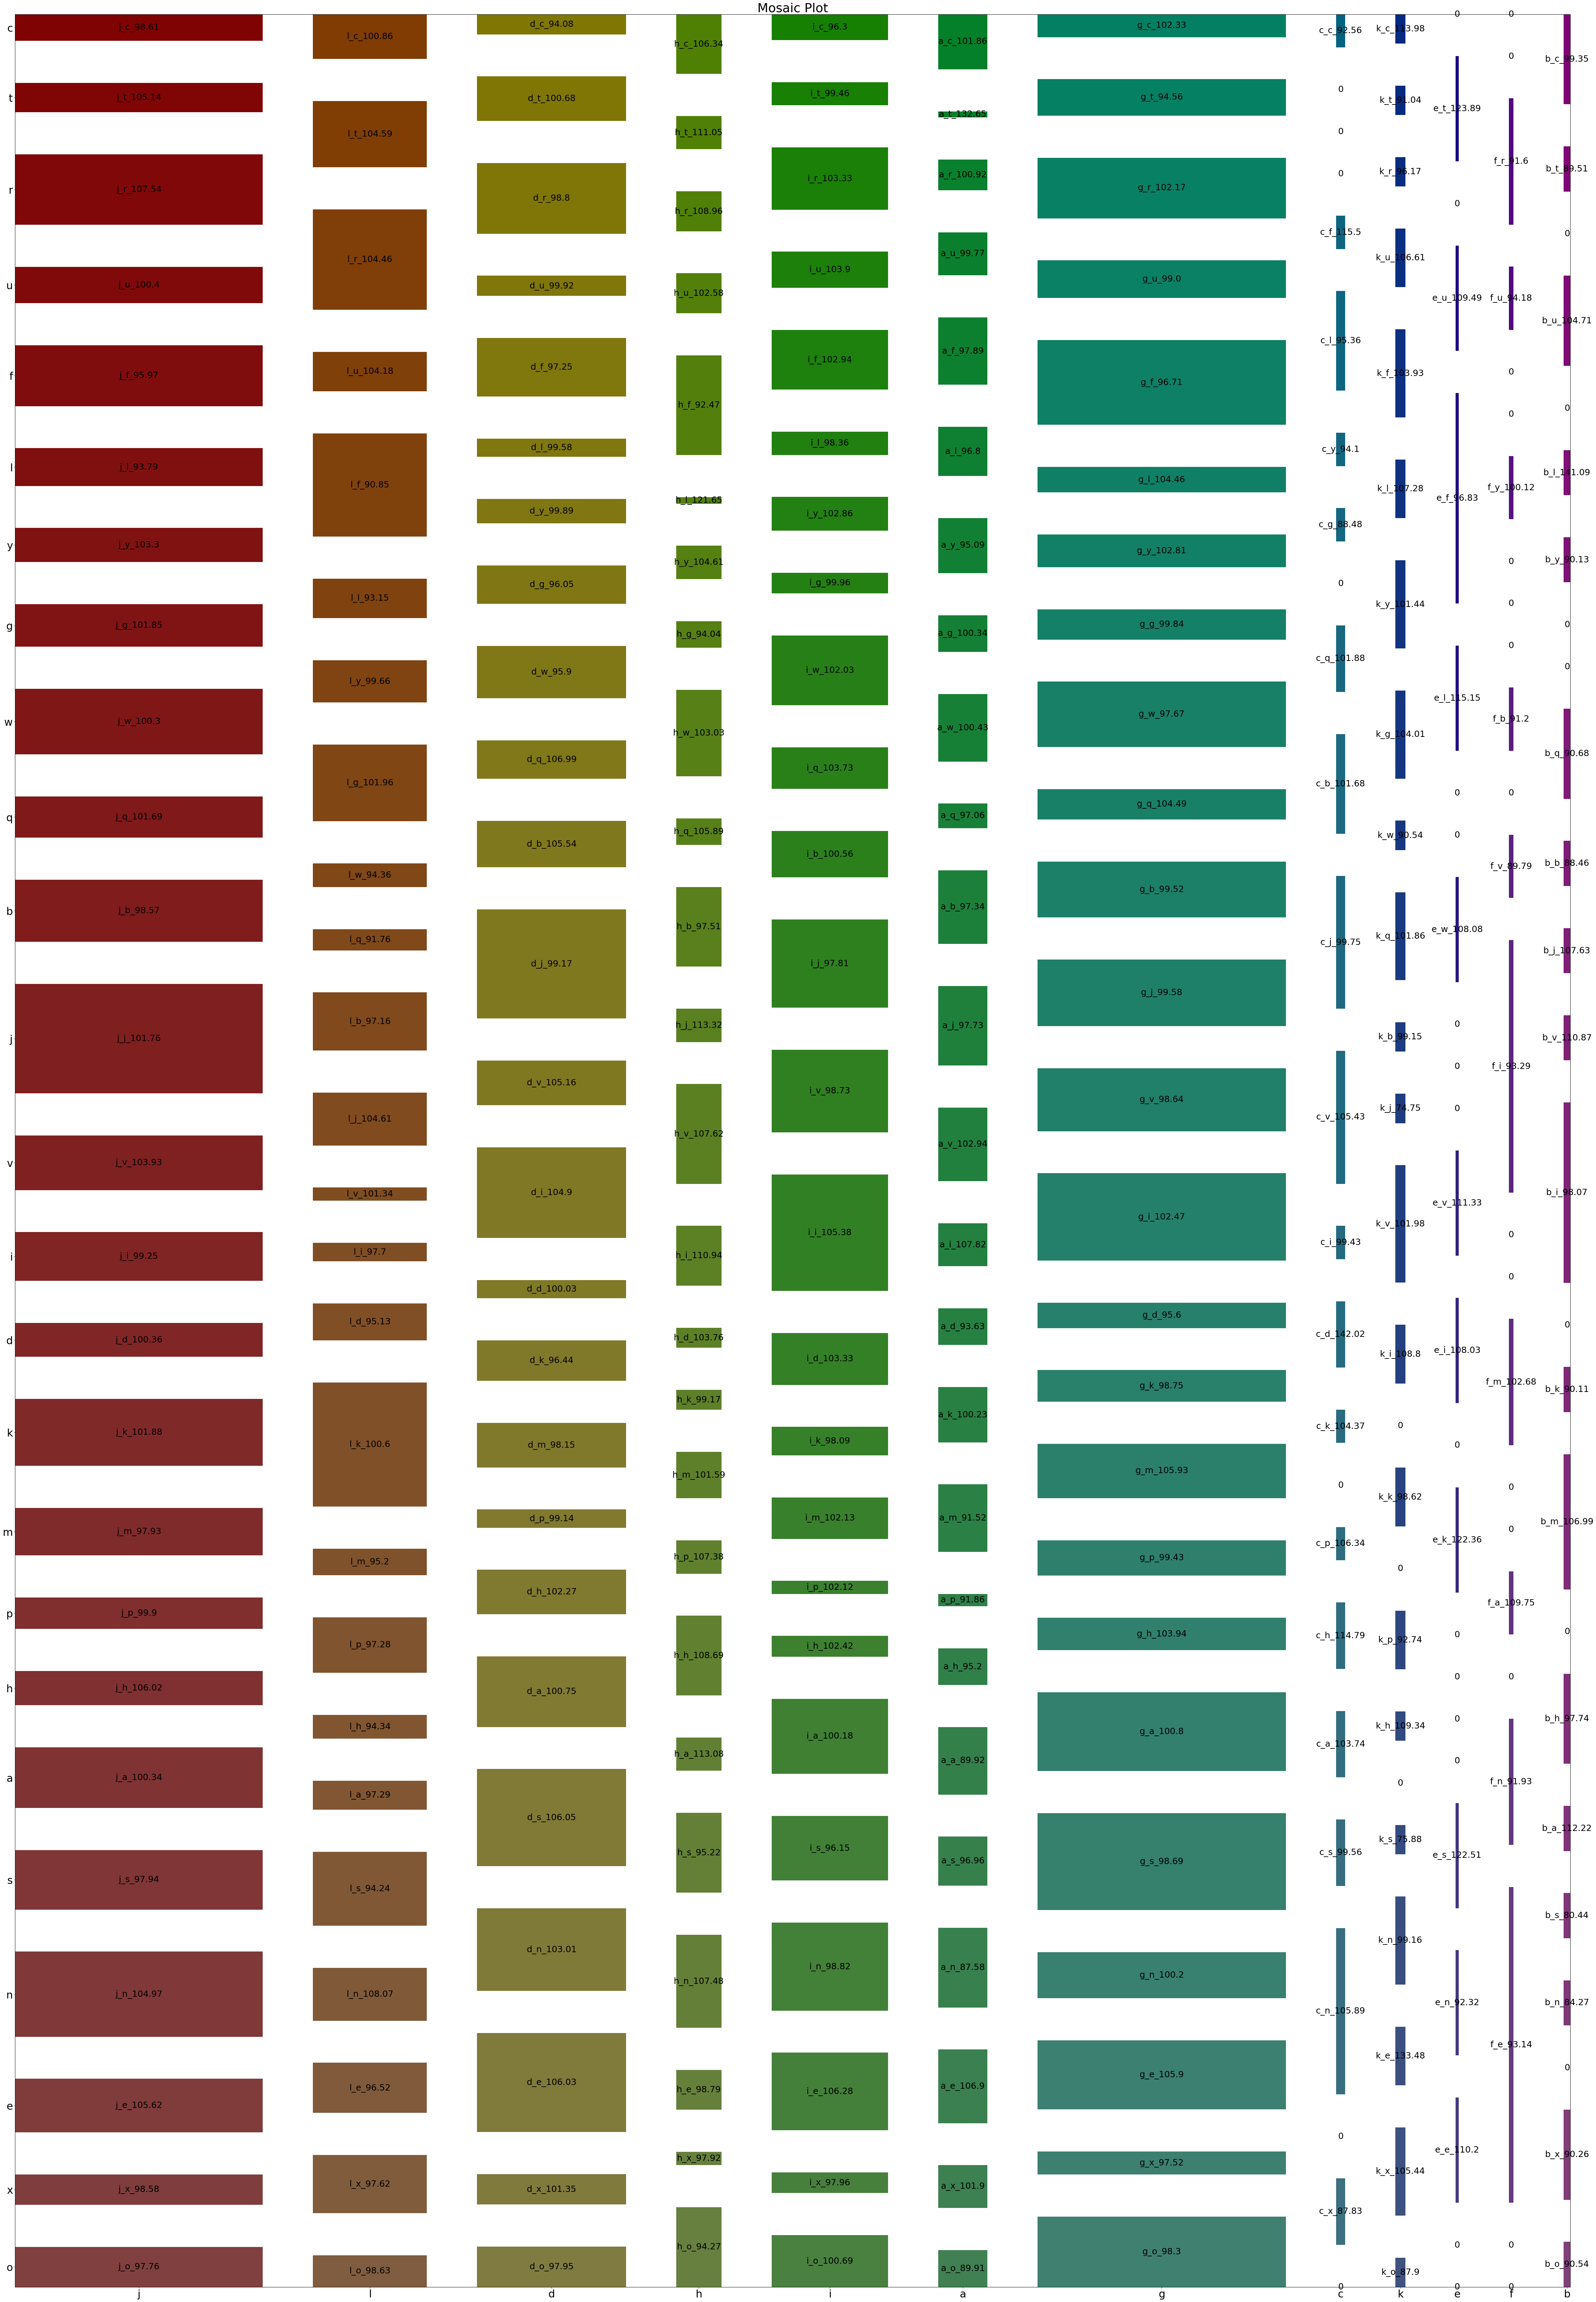

In [401]:
keys = list(dataframe_train.groupby(['X6','X8']).mean().index)
means = dataframe_train.groupby(['X6','X8']).mean()['y'].values
values = []
for i in range(len(keys)):
    
    values.append(keys[i][0]+'_'+keys[i][1]+'_'+str(np.round(means[i],2)))
dict1 = dict(zip(keys,values))



mosaic(dataframe_train,['X6','X8'], title='Mosaic Plot',labelizer=labelizer,gap=0.05)
labelizer = lambda k: dict1[k] if k in dict1 else 0

plt.show()

## Observations From Mosaic plots (Bi-variate analysis) :

1. The above plots shows the Mosaic plot between categorical features X5,X6,X8 pairwise each. The cells in the plot represent the frequencies between two categories and mean values of those combinations are shown in the centre of each cell.


2. There is no discernible trends in the mean values. Categories cannot be differentiated well using the above plots.

## CONCLUSIONS FROM EXPLORATORY DATA ANALYSIS:

<font size="4" color="green" > 
1. From the EDA performed in the above stages we removed 12 binary features which have zero variance.

2. From the univariate analysis on the categorical features we see there are some outlier points, we will proceed further without removing such points considering them as legitimate points. 

</font>


In [134]:
# saving the train and test datasets after EDA

dataframe_train.to_csv("after_eda_train.csv",index=False)
dataframe_test.to_csv("after_eda_test.csv",index=False)

In [2]:
dataframe_train = pd.read_csv('after_eda_train.csv')
dataframe_test = pd.read_csv('after_eda_test.csv')

In [3]:
dataframe_train = dataframe_train[dataframe_train['y']<250]

#dropping the ID column
dataframe_train.drop(['ID'], axis=1,inplace=True)
dataframe_test.drop(['ID'], axis=1,inplace=True)

In [4]:
print(dataframe_train.shape)
print(dataframe_test.shape)

(4208, 365)
(4209, 364)


In [5]:
dataframe_train.head()

y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X12  X13  X14  X15  X16  X17  X18  \
0  130.81   k  v  at  a  d  u  j  o    0    0    1    0    0    0    0    1   
1   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0    1   
2   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    1    0   
3   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0    0   
4   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0    0   

   X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  \
0    0    0    1    0    0    0    0    0    0    0    0    1    0    0    0   
1    0    0    0    0    0    0    0    1    0    0    0    1    0    0    0   
2    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
3    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
4    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   

   X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  \
0    1    0    1    0    0    0    0    0    0    0    0    1    0    0    0   
1    1    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
2    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
3    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
4    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   

   X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  \
0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
1    0    1    0    0    0    0    0    0    0    0    0    1    0    0    0   
2    0    1    0    0    1    0    0    0    1    0    0    1    0    0    0   
3    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
4    0    1    0    0    1    0    0    0    0    0    0    1    0    0    0   

   X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  \
0    0    0    0    1    0    1    0    0    1    0    0    0    0    0    0   
1    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   
2    0    0    0    1    0    1    1    0    1    1    1    0    0    0    1   
3    0    0    0    0    0    1    1    0    1    0    1    0    0    0    1   
4    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   

   X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  X96  \
0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    1    0    0    0    0    0    0    0    0    0    1   
2    0    0    0    1    1    0    0    0    0    0    0    0    0    0    1   
3    0    0    0    1    0    0    0    0    0    0    0    0    0    0    1   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1   

   X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  X110  \
0    0    0    0     0     0     0     0     0     0     0     0     0     0   
1    0    1    0     1     1     0     0     0     0     0     0     0     0   
2    0    1    0     0     1     0     0     0     0     0     0     0     0   
3    0    1    0     0     1     0     0     0     0     0     1     0     0   
4    0    1    0     0     1     0     0     0     0     0     1     0     0   

   X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  X123  \
0     1     0     0     1     0     1     0     1     1     1     0     0   
1     1     0     0     0     0     0     0     1     1     1     0     0   
2     1     0     0     0     0     0     0     0     0     1     0     0   
3     1     0     0     1     0     0     0     0     0     1     0     0   
4     1     0     0     1     0     0     0     0     0     1     0     0   

   X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  X135  \
0     0     0     0     0     1     0     0     1     0     0     0     0   
1     0     0     0     1     

In [6]:
# LIST OF ALL CATEGORIES PRESENT IN EACH FEATURE

categories_in_each_feature = []
for i in dataframe_train.iloc[:,1:9].columns:
    categories_in_each_feature.append(dataframe_train[i].unique())
categories_in_each_feature

[array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
        'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
        'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
        'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
       dtype=object),
 array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
        'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
        'ab'], dtype=object),
 array(['at', 'av', 'n', 'e', 'as', 'aq', 'r', 'ai', 'ak', 'm', 'a', 'k',
        'ae', 's', 'f', 'd', 'ag', 'ay', 'ac', 'ap', 'g', 'i', 'aw', 'y',
        'b', 'ao', 'al', 'h', 'x', 'au', 't', 'an', 'z', 'ah', 'p', 'am',
        'j', 'q', 'af', 'l', 'aa', 'c', 'o', 'ar'], dtype=object),
 array(['a', 'e', 'c', 'f', 'd', 'b', 'g'], dtype=object),
 array(['d', 'b', 'c', 'a'], dtype=object),
 array(['u', 'y', 'x', 'h', 'g', 'f', 'j', 'i', 'd', 'c', 'af', 'ag', 'ab',
        'ac', 'ad', 'ae', 'ah', 'l', 'k', '

## VISUALIZING DATA IN 2-D USING DIMENSIONALITY REDUCTION TECHNIQUES:

###   1.PRINCIPAL COMPONENT ANALYSIS: 

In [7]:
# considering the categorical features have ordinal values. 
# we convert the categorical features into numerical values using Mean encoding.

def Mean_encoder(feature):
    
    means_of_all_categories = dataframe_train.groupby(feature)['y'].mean()
    target_mean = dataframe_train['y'].mean()
    dataframe_train[feature] = [means_of_all_categories[i] for i in dataframe_train[feature].values]
    
    indices = means_of_all_categories.index
    values = []
    for i in dataframe_test[feature].values:
        
        if i in indices:
            values.append(means_of_all_categories[i])
        else:
            values.append(target_mean)
    
    dataframe_test[feature] = values

    
Mean_encoder('X0')
Mean_encoder('X1')
Mean_encoder('X2')
Mean_encoder('X3')
Mean_encoder('X4')
Mean_encoder('X5')
Mean_encoder('X6')
Mean_encoder('X8')

In [10]:
# Mean values of all categories

mean_list = []

j = 0
for i in dataframe_train.iloc[:,1:9].columns:
    
    dict1 = dict(zip(categories_in_each_feature[j],dataframe_train[i].unique()))
    mean_list.append(dict1)
    j+=1
    
mean_list        

[{'k': 99.49181818181819,
  'az': 78.02554285714281,
  't': 93.72457516339865,
  'al': 93.22134328358207,
  'o': 94.61869888475833,
  'w': 112.6141208791209,
  'j': 112.07270718232049,
  'h': 104.45613333333334,
  's': 93.86698113207548,
  'n': 93.49133333333332,
  'ay': 103.51702875399357,
  'f': 93.92665198237889,
  'x': 112.55533333333335,
  'y': 93.51467492260059,
  'aj': 103.9748344370861,
  'ak': 112.55223495702005,
  'am': 91.30555555555556,
  'z': 95.12136111111116,
  'q': 93.205,
  'at': 113.46520000000001,
  'ap': 116.57786407766993,
  'v': 105.195,
  'af': 112.79114285714287,
  'a': 115.63095238095237,
  'e': 93.0403125,
  'ai': 95.81058823529413,
  'd': 102.48863013698629,
  'aq': 93.84055555555557,
  'c': 112.13333333333333,
  'aa': 152.17000000000002,
  'ba': 94.15185185185184,
  'as': 115.34900000000002,
  'i': 110.59722222222223,
  'r': 113.91399999999999,
  'b': 92.59454545454547,
  'ax': 112.15210526315789,
  'bc': 76.19500000000001,
  'u': 94.09470588235293,
  'ad': 

In [11]:
with open('mean_list.pkl', 'wb') as f:
    pickle.dump(mean_list,f)
    f.close()

In [12]:
y_values = dataframe_train['y'].values
dataframe_train.drop(['y'], axis=1,inplace=True)

In [13]:
with open('targets.pkl', 'wb') as f:
      pickle.dump(y_values,f)

In [149]:
standardized_data = dataframe_train.copy()

In [150]:
# We need to standardize this data in categorical features before visualizing in PCA.
std = StandardScaler()

standardized_data.iloc[:,0:8] = std.fit_transform(standardized_data.iloc[:,0:8])
standardized_data.head()

X0        X1        X2        X3       X4         X5        X6  \
0 -0.118070  0.300838  0.591128  0.702415 -0.02018  20.631885  0.389401   
1 -0.118070 -2.655828 -0.843525 -0.223376 -0.02018  -8.272077 -1.479921   
2 -2.344518 -1.870810 -2.843539  0.497295 -0.02018 -15.169925  0.389401   
3 -2.344518 -2.655828 -2.843539 -1.579973 -0.02018 -15.169925 -1.479921   
4 -2.344518  0.300838 -2.843539 -1.579973 -0.02018 -15.457050  0.521288   

         X8  X10  X12  X13  X14  X15  X16  X17  X18  X19  X20  X21  X22  X23  \
0 -1.359546    0    0    1    0    0    0    0    1    0    0    1    0    0   
1 -1.359546    0    0    0    0    0    0    0    1    0    0    0    0    0   
2 -0.968031    0    0    0    0    0    0    1    0    0    0    0    0    0   
3  2.049331    0    0    0    0    0    0    0    0    0    0    0    0    0   
4  0.737486    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  \
0    0    0    0    0    0    0    1    0    0    0    1    0    1    0    0   
1    0    0    1    0    0    0    1    0    0    0    1    0    1    0    0   
2    0    0    1    1    1    0    1    0    0    0    1    0    1    0    0   
3    0    0    1    1    1    0    1    0    0    0    1    0    1    0    0   
4    0    0    1    1    1    0    1    0    0    0    1    0    1    0    0   

   X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  \
0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0   
2    0    0    0    1    0    0    1    0    0    0    0    1    0    0    1   
3    0    0    0    1    0    0    1    0    0    0    0    0    0    0    1   
4    0    0    0    1    0    0    1    0    0    0    0    1    0    0    1   

   X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  \
0    0    0    0    1    0    0    0    0    0    0    0    0    0    1    0   
1    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
2    0    0    0    1    0    0    1    0    0    0    0    0    0    1    0   
3    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   

   X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  X81  X82  X83  X84  X85  \
0    1    0    0    1    0    0    0    0    0    0    0    0    0    0    1   
1    1    0    0    1    0    0    0    0    0    1    0    0    0    0    1   
2    1    1    0    1    1    1    0    0    0    1    0    0    0    1    1   
3    1    1    0    1    0    1    0    0    0    1    0    0    0    1    0   
4    1    0    0    1    0    1    0    0    0    1    0    0    0    0    0   

   X86  X87  X88  X89  X90  X91  X92  X94  X95  X96  X97  X98  X99  X100  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0     0   
1    0    0    0    0    0    0    0    0    0    1    0    1    0     1   
2    0    0    0    0    0    0    0    0    0    1    0    1    0     0   
3    0    0    0    0    0    0    0    0    0    1    0    1    0     0   
4    0    0    0    0    0    0    0    0    0    1    0    1    0     0   

   X101  X102  X103  X104  X105  X106  X108  X109  X110  X111  X112  X113  \
0     0     0     0     0     0     0     0     0     0     1     0     0   
1     1     0     0     0     0     0     0     0     0     1     0     0   
2     1     0     0     0     0     0     0     0     0     1     0     0   
3     1     0     0     0     0     0     1     0     0     1     0     0   
4     1     0     0     0     0     0     1     0     0     1     0     0   

   X114  X115  X116  X117  X118  X119  X120  X122  X123  X124  X125  X126  \
0     1     0     1     0     1     1     1     0     0     0     0     0   
1     0     0     0     0     1     1     1     0     0     0     0     0   
2 

In [151]:
standardized_data.shape

(4208, 364)

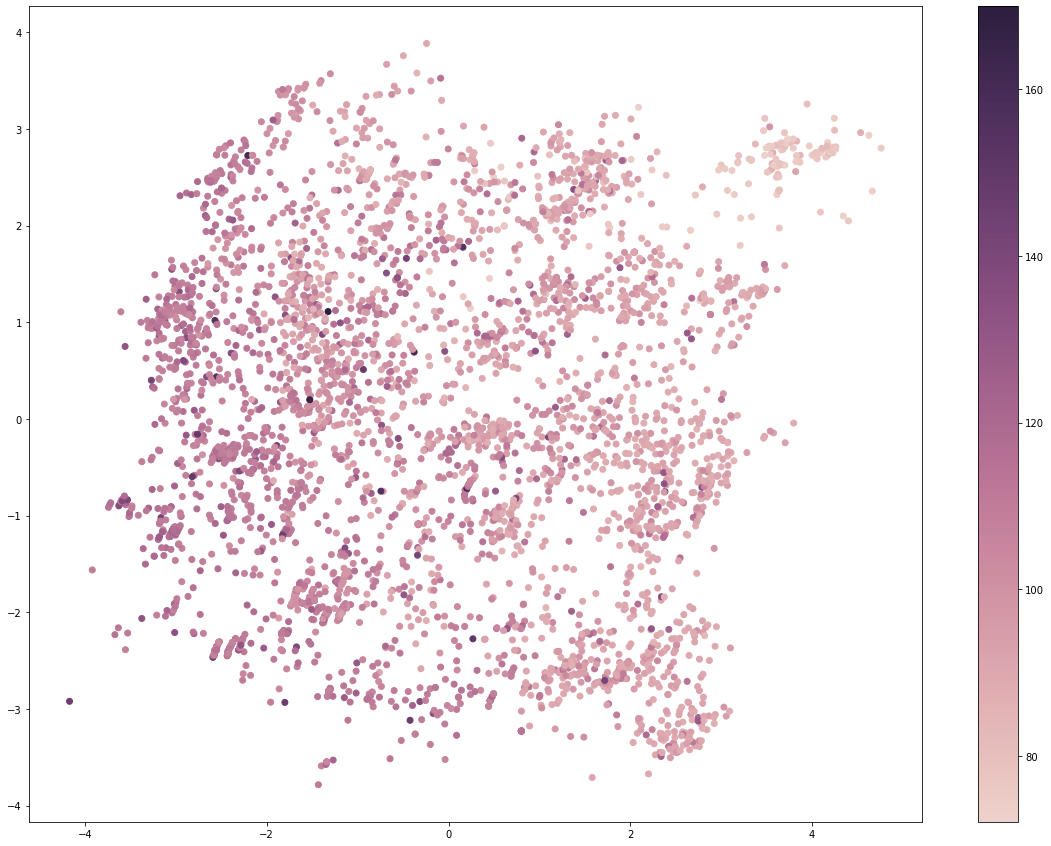

In [152]:
# Reference : https://www.kaggle.com/oysteijo/pca-and-t-sne

pca = PCA(n_components=2)
pca_results = pca.fit_transform(standardized_data)
cmap = sns.cubehelix_palette(as_cmap=True)
f,ax = plt.subplots(figsize=(20,15))
points = ax.scatter(pca_results[:,0], pca_results[:,1], c=y_values, cmap=cmap)
f.colorbar(points)
plt.show()

### Observations:

1. The above plot visualises the features in a reduced 2 dimensions using PCA.


2. Some clusters formed , But they are not well seperated.


3. Let us check how many components that are required to Explain 99 percentage of variance or to retain 99% of the information.

In [153]:
# Performing pca with n_components = 364

pca = PCA(n_components=364)
pc = pca.fit_transform(standardized_data)
pca.explained_variance_

array([3.78268227e+00, 3.04580386e+00, 2.06739327e+00, 1.74429406e+00,
       1.58883219e+00, 1.31454783e+00, 1.06237229e+00, 1.05056717e+00,
       1.00794250e+00, 9.63628725e-01, 9.18943221e-01, 8.32191072e-01,
       7.72360377e-01, 6.95617941e-01, 6.68737937e-01, 5.59510523e-01,
       4.25282764e-01, 3.84431991e-01, 3.65855770e-01, 3.56031813e-01,
       3.41216527e-01, 2.98411215e-01, 2.81457563e-01, 2.59119726e-01,
       2.36247764e-01, 2.19312343e-01, 2.17198613e-01, 2.03058026e-01,
       1.97557083e-01, 1.91295651e-01, 1.81935826e-01, 1.69044030e-01,
       1.53191097e-01, 1.46618679e-01, 1.39024899e-01, 1.32025256e-01,
       1.22199438e-01, 1.16851432e-01, 1.08198246e-01, 1.05829880e-01,
       1.02326828e-01, 9.79124640e-02, 9.52769284e-02, 8.95082162e-02,
       8.75644184e-02, 8.27194198e-02, 8.05616129e-02, 7.69248605e-02,
       7.60553266e-02, 7.41415744e-02, 7.24997063e-02, 7.07926279e-02,
       6.64217588e-02, 6.52502197e-02, 6.19246936e-02, 5.94950886e-02,
      

In [154]:
variance_explained_by_each_component = pca.explained_variance_ / np.sum(pca.explained_variance_)

In [155]:
# number of components to explain 99 percent variance of data using PCA.

count = 0
a_= 0
for i in variance_explained_by_each_component:
    a_+=i
    count += 1
    if a_ > 0.99:
        break
count

126

###   2.T-SNE : 

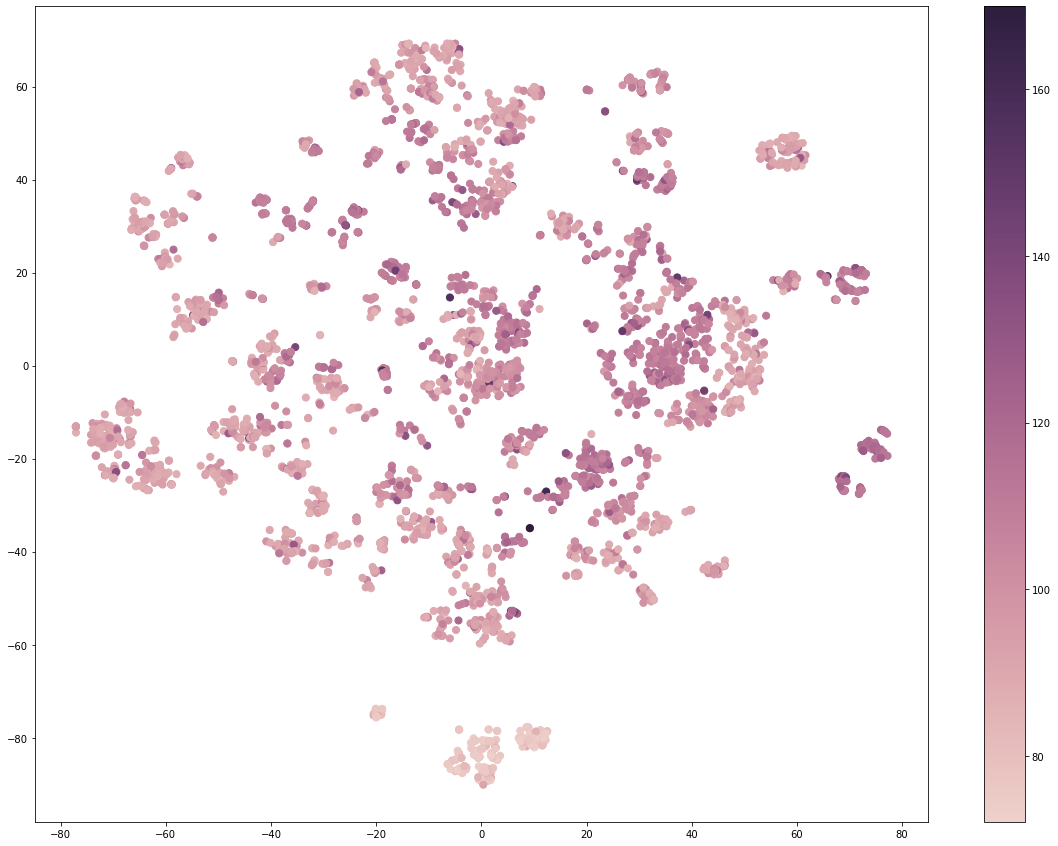

In [156]:
# Reference : https://www.kaggle.com/oysteijo/pca-and-t-sne


tsne2 = TSNE(n_components=2)
tsne2_results = tsne2.fit_transform(standardized_data)
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne2_results[:,0], tsne2_results[:,1], c=y_values, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

### Observations:

1. The above plot visualises the features in a reduced 2 dimensions using T-SNE.


2. we can observe some clusters are being formed.


3. From the above 2d plot, We conclude that we should use tree based models rather than linear models.

## FEATURE ENGINEERING :


1. Duplicate Features are removed.


2. Adding new features by combining the top features from the Random Forest Model.


3. Features with less/zero importance ie. Features with less varaince are removed.


## 1. REMOVING DUPLICATE FEATURES :

In [14]:
# Removing Duplicate Columns in our dataset

Duplicated_columns = list(dataframe_train.T.duplicated()[dataframe_train.T.duplicated()==True].index)
print("Total number of duplicated columns= " + str(len(Duplicated_columns)) )
print(Duplicated_columns)
Duplicated_columns.remove('X35')

dataframe_train.drop(Duplicated_columns, axis=1,inplace=True)
dataframe_test.drop(Duplicated_columns, axis=1,inplace=True)

Total number of duplicated columns= 45
['X35', 'X37', 'X39', 'X76', 'X84', 'X94', 'X102', 'X113', 'X119', 'X122', 'X134', 'X146', 'X147', 'X172', 'X199', 'X213', 'X214', 'X216', 'X222', 'X226', 'X227', 'X232', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X253', 'X254', 'X262', 'X266', 'X279', 'X296', 'X299', 'X302', 'X320', 'X324', 'X326', 'X360', 'X364', 'X365', 'X382', 'X385']


In [15]:
with open('Duplicated_columns.pkl', 'wb') as f:
    pickle.dump(Duplicated_columns,f)
    f.close()

<font size="3" >We kept only one such column/feature and removed the remaining 44 features.

We now have 320 features in both train and test datasets.
</font>


In [16]:
print(dataframe_train.shape)
print(dataframe_test.shape)

(4208, 320)
(4209, 320)


In [19]:
dataframe_train.head()

X0          X1          X2          X3          X4      X5  \
0  99.491818  101.412574  104.218333  102.507477  100.619125  130.81   
1  99.491818   93.723226   95.510000  100.033190  100.619125   88.53   
2  78.025543   95.764808   83.369927  101.959269  100.619125   78.44   
3  78.025543   93.723226   83.369927   96.407526  100.619125   78.44   
4  78.025543  101.412574   83.369927   96.407526  100.619125   78.02   

           X6          X8  X10  X12  X13  X14  X15  X16  X17  X18  X19  X20  \
0  101.165245   97.746933    0    0    1    0    0    0    0    1    0    0   
1   98.596709   97.746933    0    0    0    0    0    0    0    1    0    0   
2  101.165245   98.577238    0    0    0    0    0    0    1    0    0    0   
3   98.596709  104.976311    0    0    0    0    0    0    0    0    0    0   
4  101.346464  102.194215    0    0    0    0    0    0    0    0    0    0   

   X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  \
0    1    0    0    0    0    0    0    0    0    1    0    0    0    1    0   
1    0    0    0    0    0    1    0    0    0    1    0    0    0    1    0   
2    0    0    0    0    0    1    1    1    0    1    0    0    0    1    0   
3    0    0    0    0    0    1    1    1    0    1    0    0    0    1    0   
4    0    0    0    0    0    1    1    1    0    1    0    0    0    1    0   

   X38  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  X50  X51  X52  X53  \
0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
2    0    0    0    0    1    0    0    1    0    0    0    0    1    0    0   
3    0    0    0    0    1    0    0    1    0    0    0    0    0    0    0   
4    0    0    0    0    1    0    0    1    0    0    0    0    1    0    0   

   X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  X65  X66  X67  X68  \
0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    1   
1    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
2    1    0    0    0    1    0    0    1    0    0    0    0    0    0    1   
3    1    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
4    1    0    0    0    0    0    0    1    0    0    0    0    0    0    0   

   X69  X70  X71  X73  X74  X75  X77  X78  X79  X80  X81  X82  X83  X85  X86  \
0    0    1    0    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    1    0    0    1    0    0    0    0    1    0    0    0    1    0   
2    0    1    1    0    1    1    0    0    0    1    0    0    0    1    0   
3    0    1    1    0    1    0    0    0    0    1    0    0    0    0    0   
4    0    1    0    0    1    0    0    0    0    1    0    0    0    0    0   

   X87  X88  X89  X90  X91  X92  X95  X96  X97  X98  X99  X100  X101  X103  \
0    0    0    0    0    0    0    0    0    0    0    0     0     0     0   
1    0    0    0    0    0    0    0    1    0    1    0     1     1     0   
2    0    0    0    0    0    0    0    1    0    1    0     0     1     0   
3    0    0    0    0    0    0    0    1    0    1    0     0     1     0   
4    0    0    0    0    0    0    0    1    0    1    0     0     1     0   

   X104  X105  X106  X108  X109  X110  X111  X112  X114  X115  X116  X117  \
0     0     0     0     0     0     0     1     0     1     0     1     0   
1     0     0     0     0     0     0     1     0     0     0     0     0   
2     0     0     0     0     0     0     1     0     0     0     0     0   
3     0     0     0     1     0     0     1     0     1     0     0     0   
4     0     0     0     1     0     0     1     0     1     0     0     0   

   X118  X120  X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  \
0     1     1     0     0     0     0     0     1     0     0     1     0   
1     1     1     0     0     0     0     1     1     0     0     0     1   
2     0     1  

In [20]:
dataframe_test.head()


X0          X1          X2          X3          X4         X5  \
0   78.025543  101.412574   83.369927   96.407526  100.619125  100.63019   
1   93.724575   99.837365   93.722995  102.507477  100.619125  100.63019   
2   78.025543  101.412574  103.732453   96.407526  100.619125  100.63019   
3   78.025543  100.725237   83.369927   96.407526  100.619125  100.63019   
4  112.614121  101.868462  103.732453  101.959269  100.619125   88.53000   

           X6          X8  X10  X12  X13  X14  X15  X16  X17  X18  X19  X20  \
0   97.802524   99.134439    0    0    0    0    0    0    0    0    0    0   
1  100.306286  101.435086    0    0    0    0    0    0    0    0    1    0   
2  101.165245  100.455162    0    0    0    1    0    0    0    0    0    0   
3   98.596709  102.194215    0    0    0    0    0    0    0    0    0    0   
4  101.226803  100.486194    0    0    0    1    0    0    0    0    0    0   

   X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  \
0    0    0    0    0    0    1    1    1    0    1    0    0    0    1    0   
1    0    0    0    0    0    1    0    0    0    1    0    0    0    1    0   
2    0    0    0    0    0    1    0    1    0    1    0    0    0    1    0   
3    0    0    0    0    0    1    1    1    0    1    0    0    0    1    0   
4    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0   

   X38  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  X50  X51  X52  X53  \
0    0    0    0    0    1    0    0    1    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    1    1    0    0    1    1    1    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
3    0    0    0    0    1    0    0    1    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0   

   X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  X65  X66  X67  X68  \
0    1    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
1    0    0    0    0    1    0    0    1    0    0    0    0    0    0    0   
2    1    0    0    0    1    0    0    1    0    0    0    0    0    0    0   
3    1    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
4    0    0    0    0    1    0    0    1    0    0    1    0    0    0    0   

   X69  X70  X71  X73  X74  X75  X77  X78  X79  X80  X81  X82  X83  X85  X86  \
0    0    1    0    0    1    0    0    0    0    1    0    0    0    0    0   
1    0    1    0    0    1    0    0    0    0    1    0    0    0    0    0   
2    0    1    0    0    1    0    0    0    0    1    0    0    0    1    0   
3    0    1    0    0    1    0    0    0    0    1    0    0    0    0    0   
4    0    1    0    0    1    0    0    0    0    1    0    0    0    1    0   

   X87  X88  X89  X90  X91  X92  X95  X96  X97  X98  X99  X100  X101  X103  \
0    0    0    0    0    0    0    0    1    0    1    0     0     1     0   
1    0    0    0    0    0    0    0    0    0    1    0     0     1     1   
2    0    0    0    0    0    0    0    1    0    1    0     1     1     1   
3    0    0    0    0    0    0    0    1    0    1    0     0     1     0   
4    0    0    0    0    0    0    0    1    0    1    0     1     1     1   

   X104  X105  X106  X108  X109  X110  X111  X112  X114  X115  X116  X117  \
0     0     0     0     0     0     0     1     0     1     0     0     0   
1     0     0     0     0     0     0     1     0     0     0     1     0   
2     0     0     0     0     0     0     1     0     0     0     0     0   
3     0     0     0     0     0     0     1     0     1     0     0     0   
4     0     0     1     0     0     0     1     0     0     0     0     0   

   X118  X120  X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  \
0     0     0     0     0     0     0     0     1     0     0     0     1   
1     1     1     0     0     0     0     1     1     1     0     0  

### Feature importances using using Randomforrest regressor.

In [259]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(dataframe_train,y_values)
feat_importances = model.feature_importances_


features = dataframe_train.columns.tolist()
top_50_indices = np.argsort(model.feature_importances_)[::-1][:50]
top_50_importances = np.sort(model.feature_importances_)[::-1][:50]
top_50_features = []
for i in top_50_indices:
    top_50_features.append(features[i])

In [260]:
top_50_features

['X0',
 'X5',
 'X6',
 'X8',
 'X3',
 'X29',
 'X263',
 'X1',
 'X136',
 'X54',
 'X2',
 'X47',
 'X238',
 'X339',
 'X127',
 'X27',
 'X345',
 'X46',
 'X152',
 'X201',
 'X383',
 'X342',
 'X273',
 'X218',
 'X189',
 'X151',
 'X12',
 'X64',
 'X51',
 'X354',
 'X142',
 'X225',
 'X351',
 'X163',
 'X220',
 'X137',
 'X100',
 'X81',
 'X158',
 'X327',
 'X58',
 'X104',
 'X181',
 'X350',
 'X22',
 'X164',
 'X70',
 'X109',
 'X283',
 'X73']

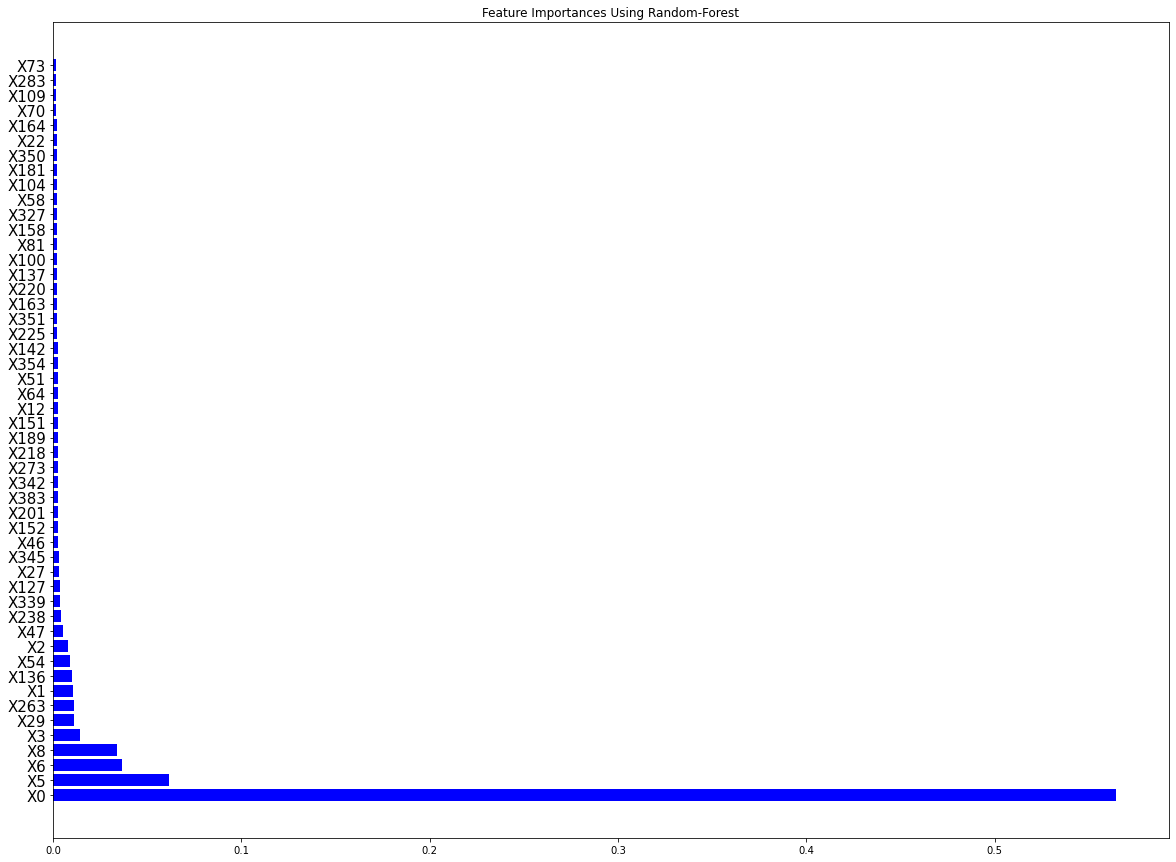

In [261]:
# bar graph showing feature importances

y_indices = np.arange(50)
plt.figure(figsize=(20,15))
bar_zero =plt.barh(y_indices,top_50_importances,color="blue")
plt.yticks(y_indices,top_50_features,fontsize=15)
plt.title("Feature Importances Using Random-Forest")
plt.show()

In [262]:
with open('top_50_features_using_treemodel.pkl', 'wb') as f:
      pickle.dump(top_50_features,f)

In [263]:
# Features with zero importance using to Random forest regressor.

features_zero_imp = []
for i in range(len(feat_importances)):
    if feat_importances[i] == 0:
        features_zero_imp.append(features[i])
features_zero_imp

['X207']

## 2. ADDING NEW FEATURES : 

In [68]:
# X0,X5,X6,X8 are some of the top features we got from randomforrest model . let us add new features with these

dataframe_train['X0_X5'] = dataframe_train.apply(lambda x: x['X0']+x['X5'],axis=1)
dataframe_train['X5_X6'] = dataframe_train.apply(lambda x: x['X5']+x['X6'],axis=1)
dataframe_train['X6_X8'] = dataframe_train.apply(lambda x: x['X6']+x['X8'],axis=1)


dataframe_test['X0_X5'] = dataframe_test.apply(lambda x: x['X0']+x['X5'],axis=1)
dataframe_test['X5_X6'] = dataframe_test.apply(lambda x: x['X5']+x['X6'],axis=1)
dataframe_test['X6_X8'] = dataframe_test.apply(lambda x: x['X6']+x['X8'],axis=1)

In [273]:
model_1 = RandomForestRegressor(n_jobs=-1)
model_1.fit(dataframe_train,y_values)
feat_importances = model_1.feature_importances_


features_1 = dataframe_train.columns.tolist()
top_50_indices_1 = np.argsort(model_1.feature_importances_)[::-1][:50]
top_50_importances_1 = np.sort(model_1.feature_importances_)[::-1][:50]
top_50_features_1 = []
for i in top_50_indices_1:
    top_50_features_1.append(features_1[i])

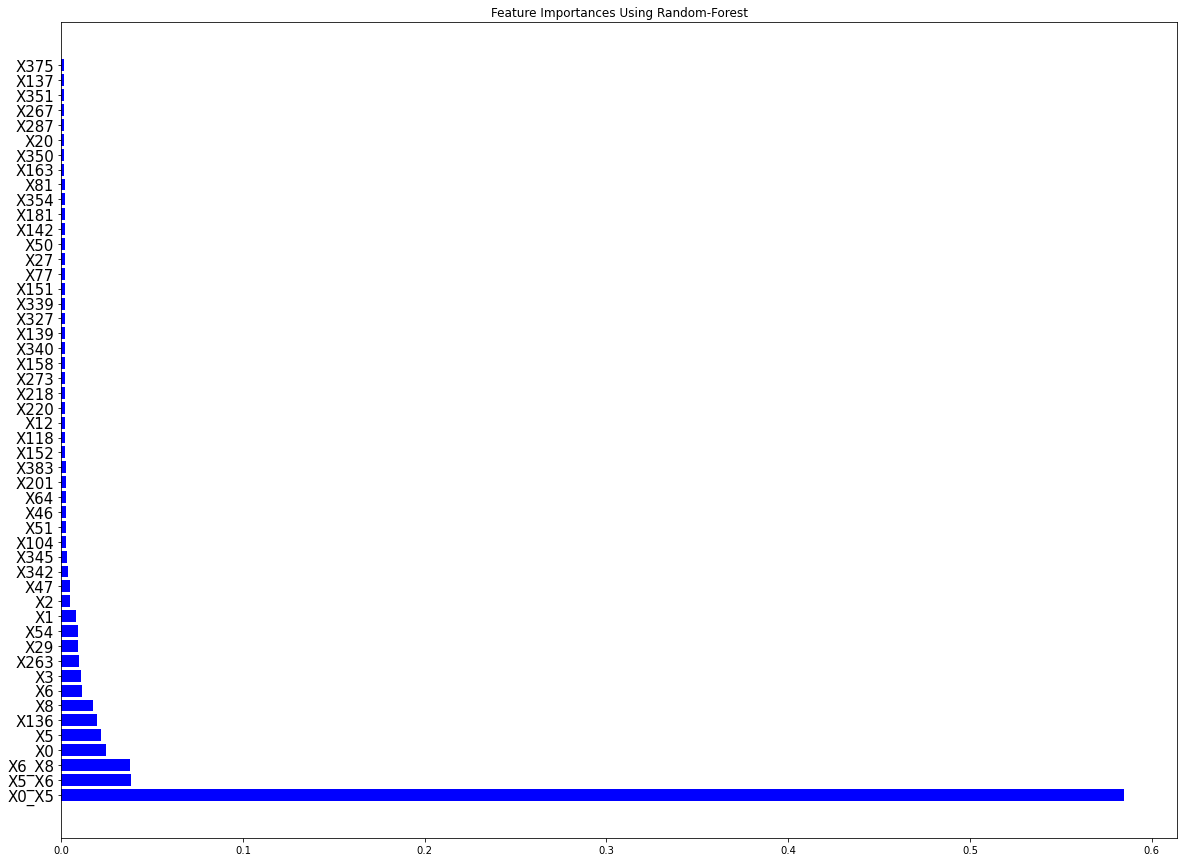

In [274]:
# bar grapgh showing feature importances

y_indices = np.arange(50)
plt.figure(figsize=(20,15))
bar_zero =plt.barh(y_indices,top_50_importances_1,color="blue")
plt.yticks(y_indices,top_50_features_1,fontsize=15)
plt.title("Feature Importances Using Random-Forest")
plt.show()

In [69]:
dataframe_train.head()

X0          X1          X2          X3          X4      X5  \
0  99.491818  101.412574  104.218333  102.507477  100.619125  130.81   
1  99.491818   93.723226   95.510000  100.033190  100.619125   88.53   
2  78.025543   95.764808   83.369927  101.959269  100.619125   78.44   
3  78.025543   93.723226   83.369927   96.407526  100.619125   78.44   
4  78.025543  101.412574   83.369927   96.407526  100.619125   78.02   

           X6          X8  X10  X12  X13  X14  X15  X16  X17  X18  X19  X20  \
0  101.165245   97.746933    0    0    1    0    0    0    0    1    0    0   
1   98.596709   97.746933    0    0    0    0    0    0    0    1    0    0   
2  101.165245   98.577238    0    0    0    0    0    0    1    0    0    0   
3   98.596709  104.976311    0    0    0    0    0    0    0    0    0    0   
4  101.346464  102.194215    0    0    0    0    0    0    0    0    0    0   

   X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  \
0    1    0    0    0    0    0    0    0    0    1    0    0    0    1    0   
1    0    0    0    0    0    1    0    0    0    1    0    0    0    1    0   
2    0    0    0    0    0    1    1    1    0    1    0    0    0    1    0   
3    0    0    0    0    0    1    1    1    0    1    0    0    0    1    0   
4    0    0    0    0    0    1    1    1    0    1    0    0    0    1    0   

   X38  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  X50  X51  X52  X53  \
0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
2    0    0    0    0    1    0    0    1    0    0    0    0    1    0    0   
3    0    0    0    0    1    0    0    1    0    0    0    0    0    0    0   
4    0    0    0    0    1    0    0    1    0    0    0    0    1    0    0   

   X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  X65  X66  X67  X68  \
0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    1   
1    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
2    1    0    0    0    1    0    0    1    0    0    0    0    0    0    1   
3    1    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
4    1    0    0    0    0    0    0    1    0    0    0    0    0    0    0   

   X69  X70  X71  X73  X74  X75  X77  X78  X79  X80  X81  X82  X83  X85  X86  \
0    0    1    0    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    1    0    0    1    0    0    0    0    1    0    0    0    1    0   
2    0    1    1    0    1    1    0    0    0    1    0    0    0    1    0   
3    0    1    1    0    1    0    0    0    0    1    0    0    0    0    0   
4    0    1    0    0    1    0    0    0    0    1    0    0    0    0    0   

   X87  X88  X89  X90  X91  X92  X95  X96  X97  X98  X99  X100  X101  X103  \
0    0    0    0    0    0    0    0    0    0    0    0     0     0     0   
1    0    0    0    0    0    0    0    1    0    1    0     1     1     0   
2    0    0    0    0    0    0    0    1    0    1    0     0     1     0   
3    0    0    0    0    0    0    0    1    0    1    0     0     1     0   
4    0    0    0    0    0    0    0    1    0    1    0     0     1     0   

   X104  X105  X106  X108  X109  X110  X111  X112  X114  X115  X116  X117  \
0     0     0     0     0     0     0     1     0     1     0     1     0   
1     0     0     0     0     0     0     1     0     0     0     0     0   
2     0     0     0     0     0     0     1     0     0     0     0     0   
3     0     0     0     1     0     0     1     0     1     0     0     0   
4     0     0     0     1     0     0     1     0     1     0     0     0   

   X118  X120  X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  \
0     1     1     0     0     0     0     0     1     0     0     1     0   
1     1     1     0     0     0     0     1     1     0     0     0     1   
2     0     1  

## 3. REMOVING FEATURES THAT ARE EITHER ONE OR ZERO IN MORE THAN 99% OF THE POINTS. (VARIANCE THRESHOLDING)

In [70]:
sel = VarianceThreshold(threshold=(.99 * (1 - .99)))
sel.fit_transform(dataframe_train).shape

(4208, 214)

In [71]:
final_features = []
index = sel.get_support(indices=True)
for i in index:
    final_features.append(dataframe_train.columns[i])
final_features

['X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X8',
 'X10',
 'X12',
 'X13',
 'X14',
 'X19',
 'X20',
 'X22',
 'X23',
 'X27',
 'X28',
 'X29',
 'X31',
 'X32',
 'X35',
 'X38',
 'X41',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X54',
 'X56',
 'X57',
 'X58',
 'X61',
 'X63',
 'X64',
 'X66',
 'X68',
 'X69',
 'X70',
 'X71',
 'X73',
 'X75',
 'X77',
 'X79',
 'X80',
 'X81',
 'X82',
 'X85',
 'X96',
 'X98',
 'X100',
 'X101',
 'X103',
 'X106',
 'X108',
 'X109',
 'X111',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X120',
 'X126',
 'X127',
 'X128',
 'X129',
 'X130',
 'X131',
 'X132',
 'X133',
 'X135',
 'X136',
 'X137',
 'X138',
 'X139',
 'X140',
 'X141',
 'X142',
 'X143',
 'X144',
 'X148',
 'X150',
 'X151',
 'X152',
 'X154',
 'X155',
 'X156',
 'X157',
 'X158',
 'X159',
 'X161',
 'X162',
 'X163',
 'X164',
 'X166',
 'X168',
 'X170',
 'X171',
 'X174',
 'X175',
 'X176',
 'X177',
 'X178',
 'X179',
 'X180',
 'X181',
 'X182',
 'X185',
 'X186',
 'X187',
 'X189',
 '

In [75]:
# Less variance features

indices_of_less_variance_features = []
j = 0
for i in sel.get_support(indices=False):
    if i == False:
        indices_of_less_variance_features.append(j)
    j+=1

less_variance_features = []
for i in indices_of_less_variance_features:
    less_variance_features.append(dataframe_train.columns[i])

with open('less_variance_features.pkl', 'wb') as f:
    pickle.dump(less_variance_features,f)

In [223]:
dataframe_train = dataframe_train[final_features]
dataframe_test = dataframe_test[final_features]

In [224]:
# saving the train and test datasets after Feature Engineering.

dataframe_train.to_csv("after_EDA_and_FE_train.csv",index=False)
dataframe_test.to_csv("after_EDA_and_FE_test.csv",index=False)

In [225]:
print(dataframe_train.shape)
print(dataframe_test.shape)
print("we are left with %d features now"%dataframe_train.shape[1])

(4208, 214)
(4209, 214)
we are left with 214 features now


# MODELING :

In [9]:
dataframe_train = pd.read_csv('after_EDA_and_FE_train.csv')
dataframe_test = pd.read_csv('after_EDA_and_FE_test.csv')

In [10]:
dataframe_train.head()

X0          X1          X2          X3          X4      X5  \
0  99.491818  101.412574  104.218333  102.507477  100.619125  130.81   
1  99.491818   93.723226   95.510000  100.033190  100.619125   88.53   
2  78.025543   95.764808   83.369927  101.959269  100.619125   78.44   
3  78.025543   93.723226   83.369927   96.407526  100.619125   78.44   
4  78.025543  101.412574   83.369927   96.407526  100.619125   78.02   

           X6          X8  X10  X12  X13  X14  X19  X20  X22  X23  X27  X28  \
0  101.165245   97.746933    0    0    1    0    0    0    0    0    0    0   
1   98.596709   97.746933    0    0    0    0    0    0    0    0    1    0   
2  101.165245   98.577238    0    0    0    0    0    0    0    0    1    1   
3   98.596709  104.976311    0    0    0    0    0    0    0    0    1    1   
4  101.346464  102.194215    0    0    0    0    0    0    0    0    1    1   

   X29  X31  X32  X35  X38  X41  X43  X44  X45  X46  X47  X48  X49  X50  X51  \
0    0    1    0    1    0    0    0    0    0    1    0    0    0    0    0   
1    0    1    0    1    0    0    0    0    0    0    0    0    0    0    1   
2    1    1    0    1    0    0    1    0    0    1    0    0    0    0    1   
3    1    1    0    1    0    0    1    0    0    1    0    0    0    0    0   
4    1    1    0    1    0    0    1    0    0    1    0    0    0    0    1   

   X52  X54  X56  X57  X58  X61  X63  X64  X66  X68  X69  X70  X71  X73  X75  \
0    0    0    0    0    1    0    0    0    0    1    0    1    0    0    0   
1    0    0    0    0    0    1    0    0    0    0    0    1    0    0    0   
2    0    1    0    0    1    1    0    0    0    1    0    1    1    0    1   
3    0    1    0    0    0    1    0    0    0    0    0    1    1    0    0   
4    0    1    0    0    0    1    0    0    0    0    0    1    0    0    0   

   X77  X79  X80  X81  X82  X85  X96  X98  X100  X101  X103  X106  X108  X109  \
0    0    0    0    0    0    1    0    0     0     0     0     0     0     0   
1    0    0    1    0    0    1    1    1     1     1     0     0     0     0   
2    0    0    1    0    0    1    1    1     0     1     0     0     0     0   
3    0    0    1    0    0    0    1    1     0     1     0     0     1     0   
4    0    0    1    0    0    0    1    1     0     1     0     0     1     0   

   X111  X114  X115  X116  X117  X118  X120  X126  X127  X128  X129  X130  \
0     1     1     0     1     0     1     1     0     0     1     0     0   
1     1     0     0     0     0     1     1     0     1     1     0     0   
2     1     0     0     0     0     0     1     0     0     1     0     0   
3     1     1     0     0     0     0     1     0     0     1     0     0   
4     1     1     0     0     0     0     1     0     0     1     0     0   

   X131  X132  X133  X135  X136  X137  X138  X139  X140  X141  X142  X143  \
0     1     0     0     0     1     1     0     0     0     0     1     0   
1     0     1     0     0     1     0     0     0     0     0     1     0   
2     0     1     0     0     0     1     0     0     0     0     0     0   
3     0     1     0     0     0     0     0     0     0     0     1     0   
4     0     1     0     0     0     0     0     0     0     0     0     0   

   X144  X148  X150  X151  X152  X154  X155  X156  X157  X158  X159  X161  \
0     1     0     1     0     0     0     0     1     0     0     0     0   
1     1     0     1     0     0     0     0     1     0     0     0     0   
2     1     1     1     0     0     0     0     0     1     1     0     0   
3     1     1     1     0     0     0     0     0     1     0     0     0   
4     1     1     1     0     0     0     0     0     1     1     0     0   

   X162  X163  X164  X166  X168  X170  X171  X174  X175  X176  X177  X178  \
0     0     0     0     0     0     1     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     1   
2     1     1     0     0     0  

In [11]:
dataframe_train.shape

(4208, 214)

In [13]:
with open('targets.pkl', 'rb') as f:
      y_train = pickle.load(f)

## Selecting top 100 features from Decision tree regressor using Recursive feature elimination :

Optimal number of features : 1


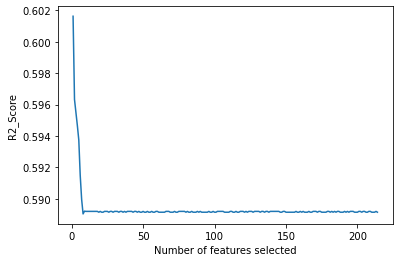

In [14]:
DT = DecisionTreeRegressor()


rfecv_DT = RFECV(estimator = DT, step=1, cv=KFold(5),scoring='r2')
rfecv_DT.fit(dataframe_train, y_train)

print("Optimal number of features : %d" % rfecv_DT.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("R2_Score")
plt.plot(range(1,len(rfecv_DT.grid_scores_) + 1),rfecv_DT.grid_scores_)
plt.show()

In [55]:
columns = list(dataframe_train.columns)

rankings_DT = list((rfecv_DT.ranking_))

top_100_features_from_DT_rfecv = []

for i in range(len(rankings_DT)):
    if rankings_DT[i]<=100:
        top_100_features_from_DT_rfecv.append(columns[i])
top_100_features_from_DT_rfecv

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X8',
 'X10',
 'X12',
 'X13',
 'X14',
 'X19',
 'X20',
 'X22',
 'X23',
 'X27',
 'X28',
 'X29',
 'X31',
 'X32',
 'X35',
 'X38',
 'X41',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X54',
 'X56',
 'X57',
 'X58',
 'X61',
 'X63',
 'X64',
 'X66',
 'X68',
 'X69',
 'X70',
 'X71',
 'X73',
 'X77',
 'X141',
 'X142',
 'X241',
 'X300',
 'X301',
 'X304',
 'X305',
 'X306',
 'X311',
 'X313',
 'X314',
 'X315',
 'X316',
 'X321',
 'X322',
 'X327',
 'X328',
 'X329',
 'X331',
 'X333',
 'X334',
 'X336',
 'X337',
 'X340',
 'X342',
 'X343',
 'X345',
 'X346',
 'X348',
 'X349',
 'X350',
 'X351',
 'X352',
 'X354',
 'X355',
 'X356',
 'X358',
 'X359',
 'X361',
 'X362',
 'X363',
 'X367',
 'X368',
 'X371',
 'X373',
 'X374',
 'X375',
 'X376',
 'X377',
 'X378',
 'X0_X5',
 'X5_X6',
 'X6_X8']

In [56]:
with open('top_100_features_from_DT_rfecv.pkl', 'wb') as f:
    pickle.dump(top_100_features_from_DT_rfecv,f)
    f.close()

## Selecting top 100 features from Random forrest regressor using Recursive feature elimination :

Optimal number of features : 1


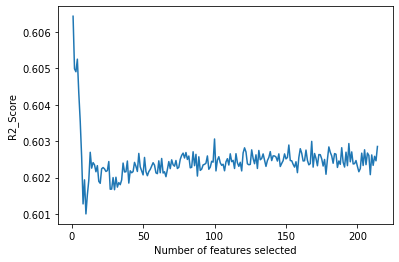

In [17]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
RF = RandomForestRegressor(n_jobs=-1)


rfecv_RF = RFECV(estimator = RF, step=1, cv=KFold(5),scoring='r2')
rfecv_RF.fit(dataframe_train, y_train)

print("Optimal number of features : %d" % rfecv_RF.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("R2_Score")
plt.plot(range(1,len(rfecv_RF.grid_scores_) + 1),rfecv_RF.grid_scores_)
plt.show()

In [57]:
columns = list(dataframe_train.columns)

rankings_RF = list((rfecv_RF.ranking_))

top_100_features_from_Rforest_rfecv = []

for i in range(len(rankings_RF)):
    if rankings_RF[i]<=100:
        top_100_features_from_Rforest_rfecv.append(columns[i])
top_100_features_from_Rforest_rfecv

['X0',
 'X1',
 'X2',
 'X3',
 'X5',
 'X6',
 'X8',
 'X12',
 'X13',
 'X14',
 'X20',
 'X22',
 'X27',
 'X29',
 'X31',
 'X35',
 'X43',
 'X46',
 'X47',
 'X51',
 'X52',
 'X54',
 'X58',
 'X61',
 'X64',
 'X70',
 'X71',
 'X73',
 'X77',
 'X81',
 'X96',
 'X100',
 'X115',
 'X117',
 'X118',
 'X127',
 'X132',
 'X135',
 'X136',
 'X139',
 'X141',
 'X142',
 'X144',
 'X150',
 'X151',
 'X152',
 'X154',
 'X155',
 'X156',
 'X157',
 'X158',
 'X163',
 'X168',
 'X175',
 'X176',
 'X177',
 'X180',
 'X181',
 'X189',
 'X191',
 'X196',
 'X201',
 'X218',
 'X219',
 'X223',
 'X225',
 'X228',
 'X241',
 'X246',
 'X256',
 'X261',
 'X263',
 'X273',
 'X275',
 'X283',
 'X286',
 'X287',
 'X311',
 'X314',
 'X316',
 'X321',
 'X322',
 'X327',
 'X329',
 'X337',
 'X342',
 'X349',
 'X350',
 'X351',
 'X354',
 'X355',
 'X356',
 'X358',
 'X363',
 'X368',
 'X375',
 'X377',
 'X0_X5',
 'X5_X6',
 'X6_X8']

In [58]:
with open('top_100_features_from_Rforest_rfecv.pkl', 'wb') as f:
    pickle.dump(top_100_features_from_Rforest_rfecv,f)
    f.close()

## Selecting top 100 features from Extra trees regressor using Recursive feature elimination:

Optimal number of features : 12


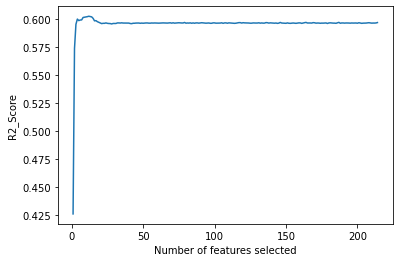

In [20]:
ET = ExtraTreesRegressor(n_jobs=-1)


rfecv_ET = RFECV(estimator = ET, step=1, cv=KFold(5),scoring='r2')
rfecv_ET.fit(dataframe_train, y_train)

print("Optimal number of features : %d" % rfecv_ET.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("R2_Score")
plt.plot(range(1,len(rfecv_ET.grid_scores_) + 1),rfecv_ET.grid_scores_)
plt.show()

In [60]:
columns = list(dataframe_train.columns)

rankings_ET = list((rfecv_ET.ranking_))

top_100_features_from_ET_rfecv = []

for i in range(len(rankings_ET)):
    if rankings_ET[i]<=100:
        top_100_features_from_ET_rfecv.append(columns[i])
top_100_features_from_ET_rfecv

['X0',
 'X1',
 'X2',
 'X3',
 'X5',
 'X6',
 'X8',
 'X12',
 'X13',
 'X14',
 'X27',
 'X29',
 'X35',
 'X38',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X51',
 'X54',
 'X56',
 'X57',
 'X58',
 'X70',
 'X71',
 'X77',
 'X81',
 'X82',
 'X85',
 'X96',
 'X100',
 'X114',
 'X115',
 'X116',
 'X118',
 'X126',
 'X127',
 'X131',
 'X132',
 'X135',
 'X136',
 'X137',
 'X142',
 'X144',
 'X151',
 'X152',
 'X154',
 'X155',
 'X156',
 'X157',
 'X158',
 'X161',
 'X163',
 'X168',
 'X170',
 'X178',
 'X179',
 'X181',
 'X187',
 'X189',
 'X201',
 'X202',
 'X209',
 'X218',
 'X219',
 'X220',
 'X223',
 'X224',
 'X225',
 'X228',
 'X229',
 'X238',
 'X241',
 'X246',
 'X251',
 'X255',
 'X256',
 'X261',
 'X263',
 'X273',
 'X275',
 'X283',
 'X285',
 'X287',
 'X294',
 'X306',
 'X311',
 'X314',
 'X315',
 'X316',
 'X321',
 'X322',
 'X327',
 'X329',
 'X342',
 'X345',
 'X349',
 'X350',
 'X351',
 'X354',
 'X355',
 'X358',
 'X363',
 'X368',
 'X374',
 'X375',
 'X377',
 'X0_X5',
 'X5_X6',
 'X6_X8']

In [81]:
with open('top_100_features_from_ET_rfecv.pkl', 'wb') as f:
    pickle.dump(top_100_features_from_ET_rfecv,f)
    f.close()

## Selecting top 100 features from XGB regressor using Recursive feature elimination :

Optimal number of features : 17


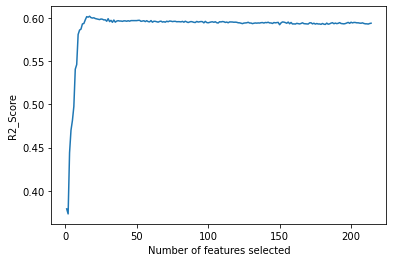

In [23]:
XGB = XGBRegressor(n_jobs=-1)


rfecv_XGB = RFECV(estimator = XGB, step=1, cv=KFold(5),scoring='r2')
rfecv_XGB.fit(dataframe_train, y_train)

print("Optimal number of features : %d" % rfecv_XGB.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("R2_Score")
plt.plot(range(1,len(rfecv_XGB.grid_scores_) + 1),rfecv_XGB.grid_scores_)
plt.show()

In [62]:
columns = list(dataframe_train.columns)

rankings_XGB = list((rfecv_XGB.ranking_))

top_100_features_from_XGB_rfecv = []

for i in range(len(rankings_XGB)):
    if rankings_XGB[i]<=100:
        top_100_features_from_XGB_rfecv.append(columns[i])
top_100_features_from_XGB_rfecv

['X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X8',
 'X12',
 'X14',
 'X19',
 'X20',
 'X23',
 'X27',
 'X29',
 'X47',
 'X54',
 'X57',
 'X58',
 'X61',
 'X64',
 'X68',
 'X71',
 'X73',
 'X77',
 'X80',
 'X82',
 'X85',
 'X100',
 'X109',
 'X115',
 'X116',
 'X117',
 'X118',
 'X120',
 'X127',
 'X132',
 'X133',
 'X135',
 'X136',
 'X138',
 'X139',
 'X141',
 'X144',
 'X150',
 'X151',
 'X152',
 'X154',
 'X155',
 'X156',
 'X158',
 'X161',
 'X162',
 'X163',
 'X176',
 'X178',
 'X180',
 'X181',
 'X186',
 'X189',
 'X196',
 'X201',
 'X208',
 'X215',
 'X218',
 'X219',
 'X220',
 'X223',
 'X225',
 'X231',
 'X234',
 'X238',
 'X241',
 'X250',
 'X251',
 'X261',
 'X263',
 'X264',
 'X265',
 'X273',
 'X275',
 'X276',
 'X283',
 'X287',
 'X294',
 'X301',
 'X311',
 'X313',
 'X314',
 'X315',
 'X316',
 'X321',
 'X322',
 'X327',
 'X328',
 'X329',
 'X334',
 'X337',
 'X340',
 'X342',
 'X345',
 'X348',
 'X349',
 'X350',
 'X351',
 'X354',
 'X355',
 'X358',
 'X362',
 'X363',
 'X368',
 'X374',
 'X375',
 'X0_X5',
 'X5_X6',

In [82]:
with open('top_100_features_from_XGB_rfecv.pkl', 'wb') as f:
    pickle.dump(top_100_features_from_XGB_rfecv,f)
    f.close()

### MODEL (i) : DECISION TREE REGRESSION WITH HYPER PARAMETER TUNING :

In [26]:
clf_DT = DecisionTreeRegressor()

paramenters_DT ={"max_depth":[1, 5, 7, 10],'min_samples_split':[2, 5, 10, 100],'min_samples_leaf':[1, 5, 10, 50]}

srch_DT = GridSearchCV(clf_DT,paramenters_DT,scoring='r2',cv=10,n_jobs=-1,return_train_score=True)

srch_DT.fit(dataframe_train[top_100_features_from_DT_rfecv],y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 7, 10],
                         'min_samples_leaf': [1, 5, 10, 50],
                         'min_samples_split': [2, 5, 10, 100]},
             return_train_score=True, scoring='r2')

In [27]:
print(srch_DT.best_params_)
clf_1_Decision_tree = srch_DT.best_estimator_
clf_1_Decision_tree.fit(dataframe_train[top_100_features_from_DT_rfecv],y_train)
print()

print("The r2score from this model = " + str(srch_DT.best_score_))

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 100}

The r2score from this model = 0.5993133081813208


In [28]:
# Saving the Model

with open("DT_Model.pkl","wb") as f:
      pickle.dump(clf_1_Decision_tree,f)

In [76]:
with open("DT_Model.pkl","rb") as f:
    clf_1_Decision_tree = pickle.load(f)
    f.close()

### PLOTTING THE RESULTS FROM DECISION TREE MODEL:

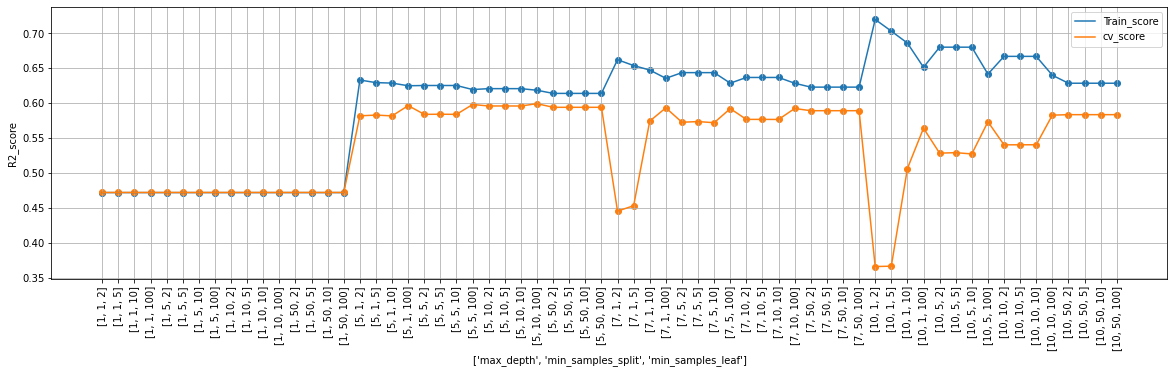

In [30]:
train_scores = srch_DT.cv_results_['mean_train_score']
test_scores = srch_DT.cv_results_['mean_test_score']
parameters = []
c = srch_DT.cv_results_['params']
for i in range(len(c)):
    parameters.append(list(c[i].values()))

indices = list(range(len(train_scores)))
plt.figure(figsize=(20,5))
plt.plot(indices,train_scores,label='Train_score')
plt.plot(indices,test_scores,label='cv_score')
plt.xticks(indices,parameters,rotation='vertical')
plt.scatter(indices,train_scores)
plt.scatter(indices,test_scores)
xlabel = list(paramenters_DT.keys())
plt.xlabel(str(xlabel))
plt.ylabel("R2_score")
plt.grid()
plt.legend()
plt.show()

### MODEL (ii): RANDOM FOREST REGRESSION WITH HYPER PARAMETER TUNING:

In [31]:
CLF_RF = RandomForestRegressor(n_jobs=-1)

parameters_RF = {'n_estimators':[100,150,200,300,350,500],'max_depth':[2,3,5,7,9,10],
              'min_samples_split':[2,3,5,7,9,10],'min_samples_leaf': [1,3,5,7,9,10]}

srch_RF = RandomizedSearchCV(CLF_RF,parameters_RF,cv=10,scoring='r2',return_train_score=True,n_jobs=-1)

srch_RF.fit(dataframe_train[top_100_features_from_Rforest_rfecv],y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 7, 9, 10],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 10],
                                        'min_samples_split': [2, 3, 5, 7, 9,
                                                              10],
                                        'n_estimators': [100, 150, 200, 300,
                                                         350, 500]},
                   return_train_score=True, scoring='r2')

In [32]:
print(srch_RF.best_params_)
clf_2_random_forest = srch_RF.best_estimator_
clf_2_random_forest.fit(dataframe_train[top_100_features_from_Rforest_rfecv],y_train)
print()

print("The r2score from this model = " + str(srch_RF.best_score_))

{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 5}

The r2score from this model = 0.606656696054874


In [33]:
# Saving the Model

with open("RF_Model.pkl","wb") as f:
      pickle.dump(clf_2_random_forest,f)

In [75]:
with open("RF_Model.pkl","rb") as f:
    clf_2_random_forest = pickle.load(f)
    f.close()

### PLOTTING THE RESULTS FROM RANDOM FOREST MODEL:

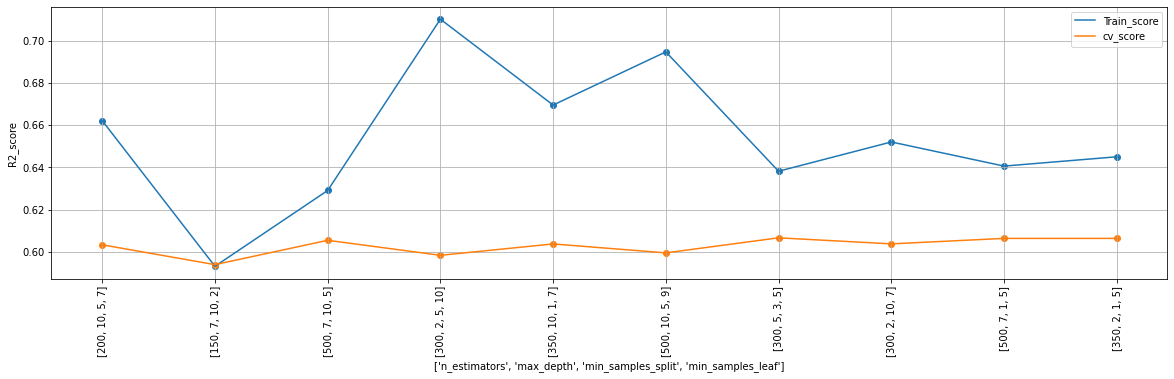

In [35]:
train_scores = srch_RF.cv_results_['mean_train_score']
test_scores = srch_RF.cv_results_['mean_test_score']
parameters = []
c = srch_RF.cv_results_['params']
for i in range(len(c)):
    parameters.append(list(c[i].values()))

indices = list(range(len(train_scores)))
plt.figure(figsize=(20,5))
plt.plot(indices,train_scores,label='Train_score')
plt.plot(indices,test_scores,label='cv_score')
plt.xticks(indices,parameters,rotation='vertical')
plt.scatter(indices,train_scores)
plt.scatter(indices,test_scores)
xlabel = list(parameters_RF.keys())
plt.xlabel(str(xlabel))
plt.ylabel("R2_score")
plt.grid()
plt.legend()
plt.show()

### MODEL (iii): EXTRA TREE REGRESSION WITH HYPER PARAMETER TUNING:

In [84]:
CLF_ETR = ExtraTreesRegressor(n_jobs=-1)

parameters_ETR = {'n_estimators':[100,150,200,300,350,500],'max_depth':[2,3,5,7,9,10],
              'min_samples_split':[2,3,5,7,9,10],'min_samples_leaf': [1,3,5,7,9,10]}

srch_ETR = RandomizedSearchCV(CLF_ETR,parameters_ETR,cv=10,scoring='r2',return_train_score=True,n_jobs=-1)

srch_ETR.fit(dataframe_train[top_100_features_from_ET_rfecv],y_train)

RandomizedSearchCV(cv=10, estimator=ExtraTreesRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 7, 9, 10],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 10],
                                        'min_samples_split': [2, 3, 5, 7, 9,
                                                              10],
                                        'n_estimators': [100, 150, 200, 300,
                                                         350, 500]},
                   return_train_score=True, scoring='r2')

In [85]:
print(srch_ETR.best_params_)
clf_3_Extratrees_regr = srch_ETR.best_estimator_
clf_3_Extratrees_regr.fit(dataframe_train[top_100_features_from_ET_rfecv],y_train)
print()

print("The r2score from this model = " + str(srch_ETR.best_score_))

{'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_depth': 5}

The r2score from this model = 0.6036722321206375


In [86]:
# Saving the Model

with open("ETR_Model.pkl","wb") as f:
      pickle.dump(clf_3_Extratrees_regr,f)

In [87]:
with open("ETR_Model.pkl","rb") as f:
    clf_3_Extratrees_regr = pickle.load(f)
    f.close()

### PLOTTING THE RESULTS FROM EXTRA TREE REGRESSION MODEL:

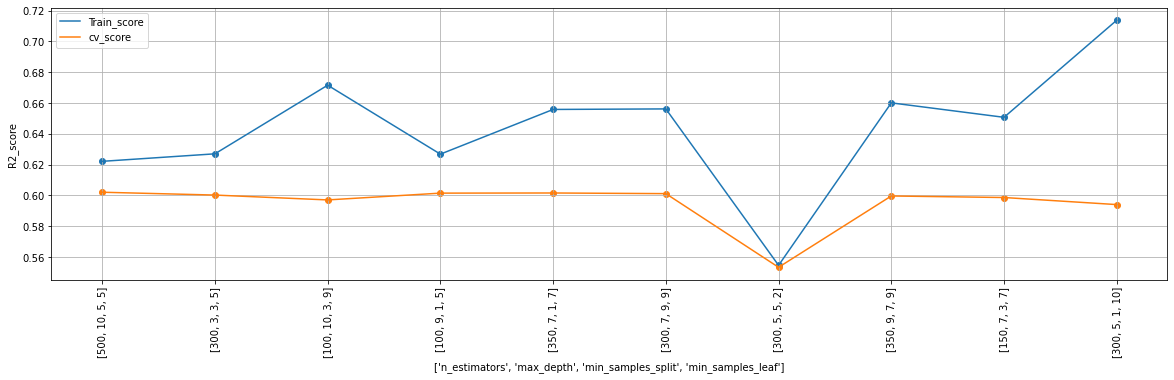

In [40]:
train_scores = srch_ETR.cv_results_['mean_train_score']
test_scores = srch_ETR.cv_results_['mean_test_score']
parameters = []
c = srch_ETR.cv_results_['params']
for i in range(len(c)):
    parameters.append(list(c[i].values()))

indices = list(range(len(train_scores)))
plt.figure(figsize=(20,5))
plt.plot(indices,train_scores,label='Train_score')
plt.plot(indices,test_scores,label='cv_score')
plt.xticks(indices,parameters,rotation='vertical')
plt.scatter(indices,train_scores)
plt.scatter(indices,test_scores)
xlabel = list(parameters_ETR.keys())
plt.xlabel(str(xlabel))
plt.ylabel("R2_score")
plt.grid()
plt.legend()
plt.show()

### MODEL (iv): XGBOOST REGRESSION WITH HYPER PARAMETER TUNING:

In [41]:
from xgboost import XGBRegressor

CLF_XGB = XGBRegressor(n_jobs=-1)

parameters_XGB = {'learning_rate':[0.001,0.01,0.05,0.1,1],'n_estimators':[100,150,200,250,300,350,500],
             'max_depth':[2,3,5,7,9,10],'subsample':[0.1,0.3,0.5,0.7,1],'colsample_bytree':[0.1,0.3,0.5,0.7,1],
             'gamma':[0,0.001,0.01,0.1,0.5,1]}

srch_XGB = RandomizedSearchCV(CLF_XGB,parameters_XGB,cv=10,scoring='r2',return_train_score=True,n_jobs=-1)

srch_XGB.fit(dataframe_train[top_100_features_from_XGB_rfecv],y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate

In [42]:
print(srch_XGB.best_params_)
clf_4_Xgboost = srch_XGB.best_estimator_
clf_4_Xgboost.fit(dataframe_train[top_100_features_from_XGB_rfecv],y_train)
print()

print("The r2score from this model = " + str(srch_XGB.best_score_))

{'subsample': 0.3, 'n_estimators': 350, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.5}

The r2score from this model = 0.5982282964011292


In [43]:
# Saving the Model

with open("XGB_Model.pkl","wb") as f:
      pickle.dump(clf_4_Xgboost,f)

In [74]:
with open("XGB_Model.pkl","rb") as f:
    clf_4_Xgboost = pickle.load(f)
    f.close()

### PLOTTING THE RESULTS FROM XGBOOST REGRESSION MODEL:

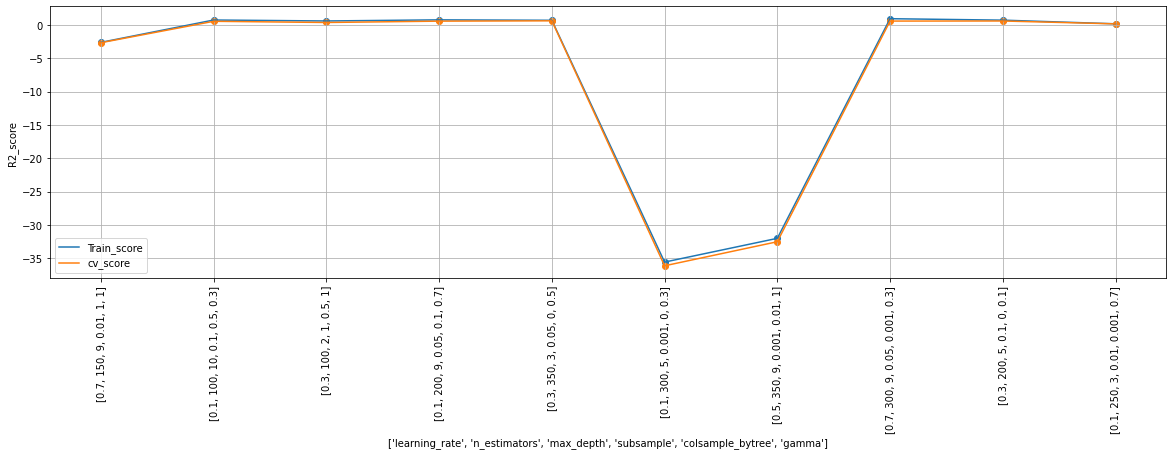

In [45]:
train_scores = srch_XGB.cv_results_['mean_train_score']
test_scores = srch_XGB.cv_results_['mean_test_score']
parameters = []
c = srch_XGB.cv_results_['params']
for i in range(len(c)):
    parameters.append(list(c[i].values()))

indices = list(range(len(train_scores)))
plt.figure(figsize=(20,5))
plt.plot(indices,train_scores,label='Train_score')
plt.plot(indices,test_scores,label='cv_score')
plt.xticks(indices,parameters,rotation='vertical')
plt.scatter(indices,train_scores)
plt.scatter(indices,test_scores)
xlabel = list(parameters_XGB.keys())
plt.xlabel(str(xlabel))
plt.ylabel("R2_score")
plt.grid()
plt.legend()
plt.show()

## 1. FINAL MODEL (Using Predictions from each model we use Ridge regression as the final estimator): 

In [89]:
# we get predictions from the four models above and we train a meta model over these prediction values
predictions_DT = clf_1_Decision_tree.predict(dataframe_train[top_100_features_from_DT_rfecv])
predictions_RF = clf_2_random_forest.predict(dataframe_train[top_100_features_from_Rforest_rfecv])
predictions_ET = clf_3_Extratrees_regr.predict(dataframe_train[top_100_features_from_ET_rfecv])
predictions_XGB = clf_4_Xgboost.predict(dataframe_train[top_100_features_from_XGB_rfecv])

In [90]:
df = pd.DataFrame()
df['DT'] = predictions_DT
df['RF'] = predictions_RF
df['ET'] = predictions_ET
df['XGB'] = predictions_XGB
df


DT          RF          ET         XGB
0     121.423000  122.384442  100.923965  125.699257
1      91.240730   90.505220   93.966354   89.229050
2      77.535055   81.851942   77.519031   77.993202
3      76.162222   82.319165   77.801170   78.152557
4      77.535055   81.682896   77.626160   78.351730
...          ...         ...         ...         ...
4203  110.267414  111.073156  111.283475  109.507057
4204  110.267414  111.336237  111.030213  108.924278
4205  110.267414  111.511093  111.362667  110.079750
4206   91.240730   88.566185   93.362284   91.569359
4207   93.374881   99.363399   93.704069   94.092422

[4208 rows x 4 columns]

In [92]:
clf = Ridge()

parameters ={"alpha":[0.0001, 0.01, 0.1, 1]}

srch_ridge = GridSearchCV(clf,parameters,scoring='r2',cv=10,n_jobs=-1,return_train_score=True)

srch_ridge.fit(df,y_train)
    
clf_best = srch_ridge.best_estimator_
    
clf_best.fit(df,y_train)

Ridge(alpha=1)

In [93]:
with open("Metamodel_top_100.pkl","wb") as f:
    pickle.dump(clf_best,f)
    f.close()

In [94]:
clf_best.score(df,y_train)

0.6317172196743888

### MODEL 2: ADABOOST REGRESSION WITH HYPER PARAMETER TUNING:

In [6]:
clf_ADA = AdaBoostRegressor()

paramenters_ADA ={'n_estimators':[100,150,200,250,300],'loss':['linear', 'square', 'exponential'],
                 'learning_rate':[0.001,0.01,0.05,0.1,1]}


srch_ADA = GridSearchCV(clf_ADA, paramenters_ADA, scoring='r2', cv=10, n_jobs=-1, return_train_score=True)


srch_ADA.fit(dataframe_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [100, 150, 200, 250, 300]},
             return_train_score=True, scoring='r2')

In [7]:
print(srch_ADA.best_params_)
clf_Adaboost = srch_ADA.best_estimator_
clf_Adaboost.fit(dataframe_train,y_train)
print()

print("The r2score from this model = " + str(srch_ADA.best_score_))

{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100}

The r2score from this model = 0.5962306938398594


In [18]:
# Saving the Model

with open("Adaboost_Model.pkl","wb") as f:
    pickle.dump(clf_Adaboost,f)
    f.close()

### PLOTTING THE RESULTS FROM ADABOOST REGRESSION MODEL :

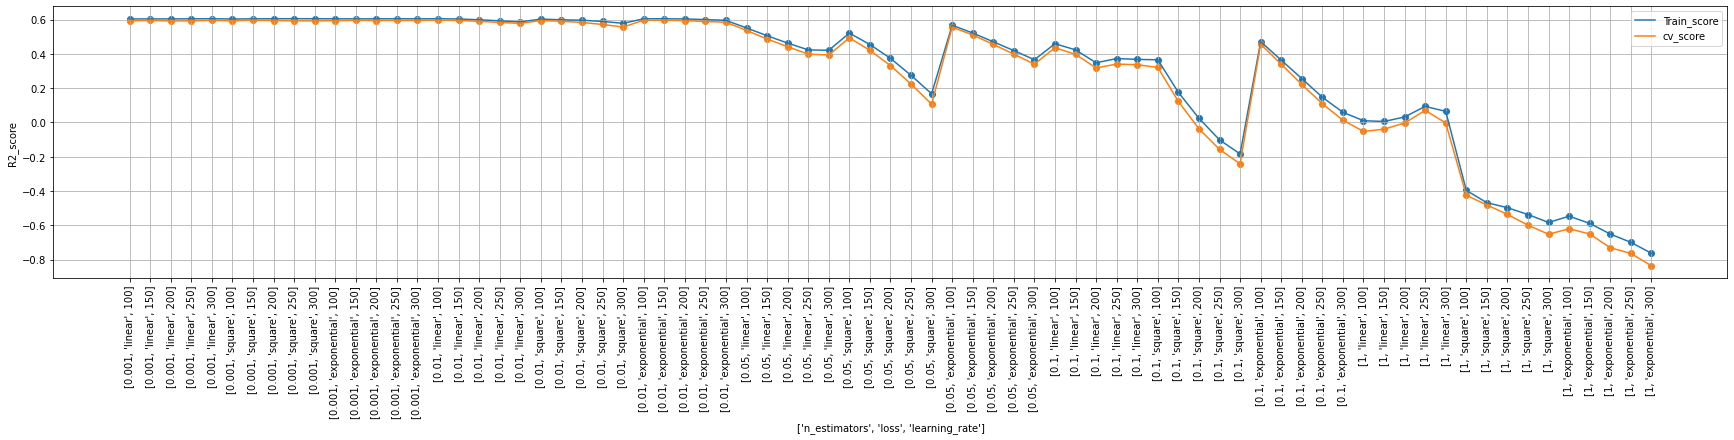

In [11]:
train_scores = srch_ADA.cv_results_['mean_train_score']
test_scores = srch_ADA.cv_results_['mean_test_score']
parameters = []
c = srch_ADA.cv_results_['params']
for i in range(len(c)):
    parameters.append(list(c[i].values()))

indices = list(range(len(train_scores)))
plt.figure(figsize=(30,5))
plt.plot(indices,train_scores,label='Train_score')
plt.plot(indices,test_scores,label='cv_score')
plt.xticks(indices,parameters,rotation='vertical')
plt.scatter(indices,train_scores)
plt.scatter(indices,test_scores)
xlabel = list(paramenters_ADA.keys())
plt.xlabel(str(xlabel))
plt.ylabel("R2_score")
plt.grid()
plt.legend()
plt.show()

## MODEL 3: CUSTOM ENSEMBLE MODEL:



1. We Split your whole data_train into train and test(80-20).


2. Now in the 80% train set, we split the train set into D1 and D2.(50-50).


3. D1 is splitted into two datasets D1_train(80% of D1), D1_cv(20% of D1).


4. Now from this D1_train we do sampling with replacement to create d1,d2,d3....dk(k samples).


5. k is the Hyperparameter and we find the best k by using D1_cv.


6. Now we create 'k' models and train each of these models with each of these k samples.


7. Now using these k predictions we create a new dataset, and for D2, we already know it's corresponding target values, so now we train a meta model with these k predictions.


8. Now for model evaluation, we use the 20% data that you have kept as the test set. we Pass the test set to each of the base models and we will get 'k' predictions. Now using the metamodel we calculate the models performance.

In [163]:
def CustomModel(X,y,k):
    
    # we split our whole data_train into train and test(80-20).
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # we split the train set into D1 and D2.(50-50).
    D1_x, D2_x, D1_y, D2_y  = train_test_split(X_tr, y_tr, test_size=0.5, random_state=42)

    # D1 is splitted into two datasets D1_train(80% of D1), D1_cv(20% of D1)
    D1_x_train, D1_x_cv, D1_y_train, D1_y_cv  = train_test_split(D1_x, D1_y, test_size=0.2, random_state=42)
    D1_x_train['y'] = D1_y_train
    
    
    
    
    # ******************************************************************************************** 
    
    # Hyper parameter tuning to find best_k
    avg_cv_scores = []
    
    for i in k:
        
        d1_k_samples = []
        d1_k_targets = []
        for j in range(i) :
            sample_x  = D1_x_train.sample(frac=0.6, replace=True)
            sample_y = sample_x['y']
            sample_x.drop(['y'],axis=1,inplace = True)
            
            d1_k_samples.append(sample_x)
            d1_k_targets.append(sample_y)
        
        k_models = []    
        for sample in range(len(d1_k_samples)):
            model = DecisionTreeRegressor()
            model.fit(d1_k_samples[sample],d1_k_targets[sample])
            k_models.append(model)
        
        cv_scores = []   
        for model in k_models:
            cv_scores.append(model.score(D1_x_cv,D1_y_cv))
            
        
            
        avg_cv_scores.append(np.mean(cv_scores))
    
    best_k = k[np.argmax(avg_cv_scores)]
    
    
    
    
    
    # ******************************************************************************************** 
    
    # Creating final k samples 
    final_k_samples = []
    final_k_targets = []
    for h in range(best_k):
        sample_x  = D1_x_train.sample(frac=0.6, replace = True)
        sample_y = sample_x['y']
        sample_x.drop(['y'],axis=1, inplace = True)
        
        final_k_samples.append(sample_x)
        final_k_targets.append(sample_y)
         
    
    
    
    
    
    
    # ********************************************************************************************
    
    # Saving all k models      
    final_model_filepaths = []    
    e = 0
    for sample_ in range(len(final_k_samples)):
        model_1 = DecisionTreeRegressor()
        model_1.fit(final_k_samples[sample_],final_k_targets[sample_])
        with open("CustomEnsemble_k_models/k_Models"+str(e)+".pkl","wb") as f:
            pickle.dump(model_1,f)
            f.close()
        final_model_filepaths.append("CustomEnsemble_k_models/k_Models"+str(e)+".pkl")
        e+=1
    
    
    # *********************************************************************************************
    
    # Using k models we get k predictions for D2 and a meta model is trained using these predictions    
    D2_predictions_for_each_model = []
    
    for w in final_model_filepaths:
        with open(w,"rb") as f:
            m = pickle.load(f)
            f.close()
         
        D2_predictions_for_each_model.append(m.predict(D2_x))
        
    df = pd.DataFrame()    
    for c in range(len(D2_predictions_for_each_model)):
        df[c] = D2_predictions_for_each_model[c]
    
    clf = Ridge()

    parameters ={"alpha":[0.0001, 0.01, 0.1, 1]}

    srch_ridge = GridSearchCV(clf,parameters,scoring='r2',cv=10,n_jobs=-1,return_train_score=True)

    srch_ridge.fit(df,D2_y)
    
    clf_best = srch_ridge.best_estimator_
    
    clf_best.fit(df,D2_y)
    
    with open("Metamodel.pkl","wb") as f:
            pickle.dump(clf_best,f)
            f.close()
        
        
    # performane of the test data 
    test_predictions_for_each_model = []
    for w in final_model_filepaths:
        with open(w,"rb") as f:
            m = pickle.load(f)
            f.close()
         
        test_predictions_for_each_model.append(m.predict(X_te))
        
    dt = pd.DataFrame()    
    for c in range(len(test_predictions_for_each_model)):
        dt[c] = test_predictions_for_each_model[c]
    
    cv_r2_score = clf_best.score(dt,y_te)
  
    return best_k, cv_r2_score

In [164]:
k = range(2,50)
CustomModel(dataframe_train,y_train,k)

(23, 0.5233088298070194)

In [165]:
#  The r2-score from the above custom model is 0.5233088298070194.

## Test Data Predictions with Various Models: 

In [96]:
# 1. Test data Predictions with Model 1 :

predictions_DT_test = clf_1_Decision_tree.predict(dataframe_test[top_100_features_from_DT_rfecv])
predictions_RF_test = clf_2_random_forest.predict(dataframe_test[top_100_features_from_Rforest_rfecv])
predictions_ET_test = clf_3_Extratrees_regr.predict(dataframe_test[top_100_features_from_ET_rfecv])
predictions_XGB_test = clf_4_Xgboost.predict(dataframe_test[top_100_features_from_XGB_rfecv])

dt = pd.DataFrame()
dt['DT'] = predictions_DT_test
dt['RF'] = predictions_RF_test
dt['ET'] = predictions_ET_test
dt['XGB'] = predictions_XGB_test
dt

a = pd.read_csv('test.csv')
IDS = a['ID']

y_predicted = clf_best.predict(dt)
test_predictions = pd.DataFrame()
test_predictions["ID"] = IDS
test_predictions["y"] = y_predicted
test_predictions.head()

ID          y
0   1  77.429117
1   2  93.067467
2   3  78.806937
3   4  77.498872
4   5  99.241289

In [97]:
test_predictions.to_csv("test_predictions_top_100_feat_stacked.csv",index=False)

In [38]:
# 2. Test data Predictions with Adaboost Model :

a = pd.read_csv('test.csv')
IDS = a['ID']

y_predicted = clf_Adaboost.predict(dataframe_test)
test_predictions = pd.DataFrame()
test_predictions["ID"] = IDS
test_predictions["y"] = y_predicted
test_predictions.head()

ID          y
0   1  77.743110
1   2  94.130005
2   3  77.699679
3   4  77.735964
4   5  98.389716

In [39]:
test_predictions.to_csv("test_predictions_Adaboost_Model.csv",index=False)

In [173]:
# 3. Test data Predictions with Custom Ensemble Model :

def CustomEnsembleModelEvaluate(X_te) :
    model_paths = []
    for (dirpath, dirnames, filenames) in os.walk('CustomEnsemble_k_models'):
        model_paths.extend(filenames)
        break
    
    test_predictions_for_each_model = []
    for w in model_paths:
        with open('CustomEnsemble_k_models/' + w,"rb") as f:
            m = pickle.load(f)
            f.close()
         
        test_predictions_for_each_model.append(m.predict(X_te))
        
    dt = pd.DataFrame()    
    for c in range(len(test_predictions_for_each_model)):
        dt[c] = test_predictions_for_each_model[c]
    
    
    with open('Metamodel.pkl',"rb") as f:
        meta_model = pickle.load(f)
        f.close()
    test_predictions = meta_model.predict(dt)
    
    return test_predictions



a = pd.read_csv('test.csv')
IDS = a['ID']
y_predicted = CustomEnsembleModelEvaluate(dataframe_test)
test_predictions = pd.DataFrame()
test_predictions["ID"] = IDS
test_predictions["y"] = y_predicted
test_predictions.head()

ID          y
0   1  79.863969
1   2  92.985326
2   3  78.185931
3   4  78.840032
4   5  99.653181

In [174]:
test_predictions.to_csv("test_predictions_Custom_Ensemble_Model.csv",index=False)

### R2_SCORE ON TEST DATA PREDICTIONS:

In [98]:
import prettytable
from prettytable import PrettyTable

x = PrettyTable(["Model", "Public_R2_Score","Private_R2_Score"])
x.add_row(["top_100_feat_Stacked_Model(Decisiontree_Rf_GBDT_Extratree)","0.55591","0.54588"])
x.add_row(["Adaboostmodel","0.55069","0.53798"])
x.add_row(["Custom_Ensemble_Model","0.50339","0.48417"])
print(x)

+------------------------------------------------------------+-----------------+------------------+
|                           Model                            | Public_R2_Score | Private_R2_Score |
+------------------------------------------------------------+-----------------+------------------+
| top_100_feat_Stacked_Model(Decisiontree_Rf_GBDT_Extratree) |     0.55591     |     0.54588      |
|                       Adaboostmodel                        |     0.55069     |     0.53798      |
|                   Custom_Ensemble_Model                    |     0.50339     |     0.48417      |
+------------------------------------------------------------+-----------------+------------------+


<img src="result1.png">

<img src="result.png">